<a href="https://colab.research.google.com/github/MimmoDG/NBA-Project---Programming/blob/main/Project_VR481299_Di_Grazia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import sklearn.metrics as skm
import time
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn import cluster
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

# LeBron James analysis:


*   Record breaker
*   Career trends

His datasets are automatically updated using html

## Per Game LeBron

In [4]:
data = pd.read_html('https://www.basketball-reference.com/players/j/jamesle01.html')

In [5]:
LeBron_Career_PerGame_RS = pd.DataFrame(data[0])

In [6]:
for el in LeBron_Career_PerGame_RS:
  if(el != "Season" and el != "Pos"  and el != "Tm" and el != "Lg"):
    LeBron_Career_PerGame_RS[el] = pd.to_numeric(LeBron_Career_PerGame_RS[el])

In [7]:
LeBron_Career_PerGame_RS 

,Season,Age,Tm,Lg,Pos,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2003-04,19.0,CLE,NBA,SG,79.0,79.0,39.5,7.9,18.9,...,0.754,1.3,4.2,5.5,5.9,1.6,0.7,3.5,1.9,20.9
1,2004-05,20.0,CLE,NBA,SF,80.0,80.0,42.4,9.9,21.1,...,0.750,1.4,6.0,7.4,7.2,2.2,0.7,3.3,1.8,27.2
2,2005-06,21.0,CLE,NBA,SF,79.0,79.0,42.5,11.1,23.1,...,0.738,0.9,6.1,7.0,6.6,1.6,0.8,3.3,2.3,31.4
3,2006-07,22.0,CLE,NBA,SF,78.0,78.0,40.9,9.9,20.8,...,0.698,1.1,5.7,6.7,6.0,1.6,0.7,3.2,2.2,27.3
4,2007-08,23.0,CLE,NBA,SF,75.0,74.0,40.4,10.6,21.9,...,0.712,1.8,6.1,7.9,7.2,1.8,1.1,3.4,2.2,30.0
5,2008-09,24.0,CLE,NBA,SF,81.0,81.0,37.7,9.7,19.9,...,0.780,1.3,6.3,7.6,7.2,1.7,1.1,3.0,1.7,28.4
6,2009-10,25.0,CLE,NBA,SF,76.0,76.0,39.0,10.1,20.1,...,0.767,0.9,6.4,7.3,8.6,1.6,1.0,3.4,1.6,29.7
7,2010-11,26.0,MIA,NBA,SF,79.0,79.0,38.8,9.6,18.8,...,0.759,1.0,6.5,7.5,7.0,1.6,0.6,3.6,2.1,26.7
8,2011-12,27.0,MIA,NBA,SF,62.0,62.0,37.5,10.0,18.9,...,0.771,1.5,6.4,7.9,6.2,1.9,0.8,3.4,1.5,27.1
9,2012-13,28.0,MIA,NBA,PF,76.0,76.0,37.9,10.1,17.8,...,0.753,1.3,6.8,8.0,7.3,1.7,0.9,3.0,1.4,26.8


In [8]:
LeB_C_PG_RS1 = LeBron_Career_PerGame_RS.drop(labels=range(19, 24), axis=0)

In [9]:
LeB_C_PG_RS = LeB_C_PG_RS1.drop(labels=['Lg', 'Age', 'GS'], axis=1)

In [10]:
LeB_C_PG_RS

,Season,Tm,Pos,G,MP,FG,FGA,FG%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2003-04,CLE,SG,79.0,39.5,7.9,18.9,0.417,0.8,2.7,...,0.754,1.3,4.2,5.5,5.9,1.6,0.7,3.5,1.9,20.9
1,2004-05,CLE,SF,80.0,42.4,9.9,21.1,0.472,1.4,3.9,...,0.750,1.4,6.0,7.4,7.2,2.2,0.7,3.3,1.8,27.2
2,2005-06,CLE,SF,79.0,42.5,11.1,23.1,0.480,1.6,4.8,...,0.738,0.9,6.1,7.0,6.6,1.6,0.8,3.3,2.3,31.4
3,2006-07,CLE,SF,78.0,40.9,9.9,20.8,0.476,1.3,4.0,...,0.698,1.1,5.7,6.7,6.0,1.6,0.7,3.2,2.2,27.3
4,2007-08,CLE,SF,75.0,40.4,10.6,21.9,0.484,1.5,4.8,...,0.712,1.8,6.1,7.9,7.2,1.8,1.1,3.4,2.2,30.0
5,2008-09,CLE,SF,81.0,37.7,9.7,19.9,0.489,1.6,4.7,...,0.780,1.3,6.3,7.6,7.2,1.7,1.1,3.0,1.7,28.4
6,2009-10,CLE,SF,76.0,39.0,10.1,20.1,0.503,1.7,5.1,...,0.767,0.9,6.4,7.3,8.6,1.6,1.0,3.4,1.6,29.7
7,2010-11,MIA,SF,79.0,38.8,9.6,18.8,0.510,1.2,3.5,...,0.759,1.0,6.5,7.5,7.0,1.6,0.6,3.6,2.1,26.7
8,2011-12,MIA,SF,62.0,37.5,10.0,18.9,0.531,0.9,2.4,...,0.771,1.5,6.4,7.9,6.2,1.9,0.8,3.4,1.5,27.1
9,2012-13,MIA,PF,76.0,37.9,10.1,17.8,0.565,1.4,3.3,...,0.753,1.3,6.8,8.0,7.3,1.7,0.9,3.0,1.4,26.8


In [11]:
LeB_C_PG_RS.to_csv('df_LBJ_xG_Stats_final.csv', index=False)

In [12]:
LeB_C_PG_RS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 0 to 18
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Season  19 non-null     object 
 1   Tm      19 non-null     object 
 2   Pos     19 non-null     object 
 3   G       19 non-null     float64
 4   MP      19 non-null     float64
 5   FG      19 non-null     float64
 6   FGA     19 non-null     float64
 7   FG%     19 non-null     float64
 8   3P      19 non-null     float64
 9   3PA     19 non-null     float64
 10  3P%     19 non-null     float64
 11  2P      19 non-null     float64
 12  2PA     19 non-null     float64
 13  2P%     19 non-null     float64
 14  eFG%    19 non-null     float64
 15  FT      19 non-null     float64
 16  FTA     19 non-null     float64
 17  FT%     19 non-null     float64
 18  ORB     19 non-null     float64
 19  DRB     19 non-null     float64
 20  TRB     19 non-null     float64
 21  AST     19 non-null     float64
 22  STL 

In [13]:
LeB_C_PG_RS.describe()

,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,...,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,71.894737,37.952632,9.921053,19.626316,0.506947,1.610526,4.626316,0.345684,8.321053,14.989474,...,0.731053,1.157895,6.363158,7.500000,7.368421,1.547368,0.752632,3.515789,1.842105,27.110526
std,10.332767,2.470800,0.745042,1.515418,0.036055,0.499883,1.353531,0.026967,0.672953,1.648870,...,0.033763,0.291196,0.801534,0.822598,1.164308,0.267433,0.219516,0.330426,0.263135,2.347551
min,45.000000,33.400000,7.900000,17.600000,0.417000,0.800000,2.400000,0.290000,7.100000,12.000000,...,0.665000,0.600000,4.200000,5.500000,5.900000,1.100000,0.300000,3.000000,1.400000,20.900000
25%,68.000000,36.500000,9.650000,18.550000,0.486000,1.350000,3.800000,0.331500,8.100000,13.700000,...,0.704000,1.000000,6.000000,7.150000,6.450000,1.350000,0.600000,3.300000,1.650000,25.850000
50%,76.000000,37.700000,9.900000,19.300000,0.510000,1.600000,4.700000,0.348000,8.500000,14.900000,...,0.738000,1.100000,6.400000,7.600000,7.200000,1.600000,0.700000,3.500000,1.800000,27.100000
75%,79.000000,39.250000,10.100000,20.450000,0.527500,1.750000,5.050000,0.362500,8.600000,16.300000,...,0.755000,1.300000,6.950000,7.950000,8.050000,1.650000,0.900000,3.650000,2.050000,27.950000
max,82.000000,42.500000,11.400000,23.100000,0.567000,2.900000,8.000000,0.406000,9.500000,18.300000,...,0.780000,1.800000,7.500000,8.600000,10.200000,2.200000,1.100000,4.200000,2.300000,31.400000


In [14]:
a = LeB_C_PG_RS['PTS'].head(7).mean() #media punti ai cavs (prima esperienza)
b = LeB_C_PG_RS['PTS'].iloc[7:11].mean() #media punti agli heat
c = LeB_C_PG_RS['PTS'].iloc[11:15].mean() #media punti ai cavs (seconda esperienza)
d = LeB_C_PG_RS['PTS'].tail(4).mean() #media punti ai lakers
[a, b, c, d]

[27.842857142857145, 26.924999999999997, 26.125, 27.0]

In [15]:
LeB_C_PG_RS.corr()

,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
G,1.000000,0.648481,-0.077635,0.084983,-0.163009,-0.597796,-0.567433,-0.231603,0.345488,0.540898,...,0.385871,0.399113,-0.398275,-0.291513,-0.111583,0.510551,0.105450,-0.214274,0.167228,0.058909
MP,0.648481,1.000000,0.214543,0.599188,-0.393790,-0.434083,-0.399955,-0.293063,0.575323,0.877108,...,0.347130,0.344543,-0.424520,-0.300400,-0.444719,0.706464,0.281411,-0.433860,0.448433,0.381008
FG,-0.077635,0.214543,1.000000,0.586997,0.447180,0.473729,0.451164,0.324972,0.764734,0.178369,...,0.043020,0.116984,0.594905,0.615501,0.034752,-0.008071,0.417460,-0.107490,0.238934,0.907674
FGA,0.084983,0.599188,0.586997,1.000000,-0.459361,0.236494,0.344434,-0.374311,0.488082,0.641110,...,0.050896,0.120992,-0.021569,0.036099,-0.166067,0.250355,0.528351,-0.278247,0.674168,0.684852
FG%,-0.163009,-0.393790,0.447180,-0.459361,1.000000,0.235532,0.088256,0.781696,0.317402,-0.490062,...,-0.018572,0.008244,0.666233,0.631072,0.210514,-0.252666,-0.142124,0.173081,-0.489886,0.247525
3P,-0.597796,-0.434083,0.473729,0.236494,0.235532,1.000000,0.975023,0.360453,-0.202176,-0.578167,...,-0.328874,-0.477674,0.616652,0.451251,0.426325,-0.598202,0.161744,0.342010,0.089362,0.356384
3PA,-0.567433,-0.399955,0.451164,0.344434,0.088256,0.975023,1.000000,0.157771,-0.211065,-0.499466,...,-0.368747,-0.453719,0.535554,0.383207,0.417595,-0.609870,0.191408,0.328197,0.219774,0.370047
3P%,-0.231603,-0.293063,0.324972,-0.374311,0.781696,0.360453,0.157771,1.000000,0.096512,-0.468733,...,0.044562,-0.199171,0.558969,0.463816,0.241718,-0.066370,-0.057099,0.130897,-0.575813,0.177147
2P,0.345488,0.575323,0.764734,0.488082,0.317402,-0.202176,-0.211065,0.096512,1.000000,0.628058,...,0.288718,0.492399,0.202360,0.352259,-0.290523,0.441757,0.341835,-0.381341,0.211194,0.747841
2PA,0.540898,0.877108,0.178369,0.641110,-0.490062,-0.578167,-0.499466,-0.468733,0.628058,1.000000,...,0.352878,0.480362,-0.454296,-0.277705,-0.495028,0.734438,0.331616,-0.530935,0.438993,0.335591


<AxesSubplot:>

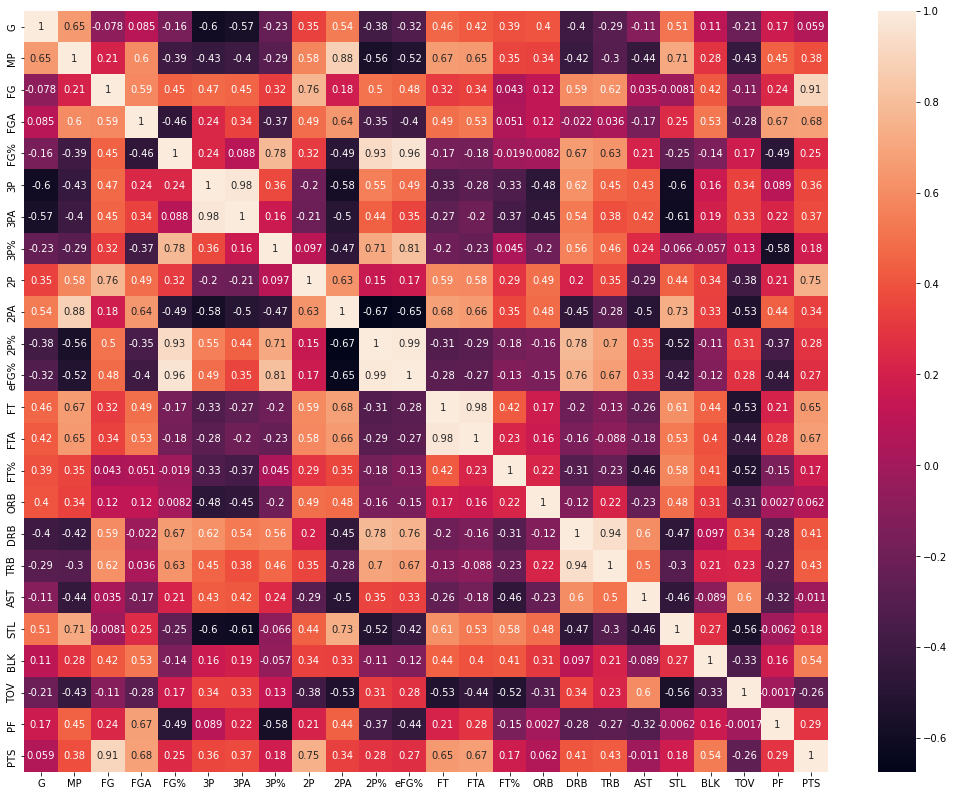

In [16]:
plt.figure(figsize=(18, 14))
sb.heatmap(LeB_C_PG_RS.corr(), annot=True)

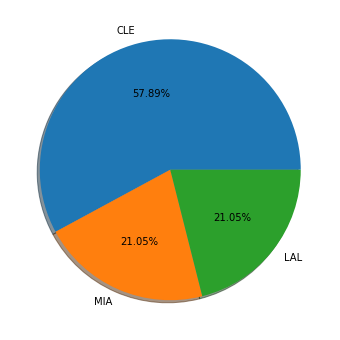

In [17]:
Team = list(LeB_C_PG_RS['Tm'])
CLE = Team.count('CLE')
MIA = Team.count('MIA')
LAL = Team.count('LAL')

Teams = ['CLE', 'MIA', 'LAL']
count = [CLE, MIA, LAL]
plt.figure(figsize=(10,6))
plt.pie(count, labels=Teams, autopct='%.2f%%', shadow=True)
plt.show()

array([[<AxesSubplot:title={'center':'G'}>,
        <AxesSubplot:title={'center':'MP'}>,
        <AxesSubplot:title={'center':'FG'}>,
        <AxesSubplot:title={'center':'FGA'}>,
        <AxesSubplot:title={'center':'FG%'}>],
       [<AxesSubplot:title={'center':'3P'}>,
        <AxesSubplot:title={'center':'3PA'}>,
        <AxesSubplot:title={'center':'3P%'}>,
        <AxesSubplot:title={'center':'2P'}>,
        <AxesSubplot:title={'center':'2PA'}>],
       [<AxesSubplot:title={'center':'2P%'}>,
        <AxesSubplot:title={'center':'eFG%'}>,
        <AxesSubplot:title={'center':'FT'}>,
        <AxesSubplot:title={'center':'FTA'}>,
        <AxesSubplot:title={'center':'FT%'}>],
       [<AxesSubplot:title={'center':'ORB'}>,
        <AxesSubplot:title={'center':'DRB'}>,
        <AxesSubplot:title={'center':'TRB'}>,
        <AxesSubplot:title={'center':'AST'}>,
        <AxesSubplot:title={'center':'STL'}>],
       [<AxesSubplot:title={'center':'BLK'}>,
        <AxesSubplot:title={'center'

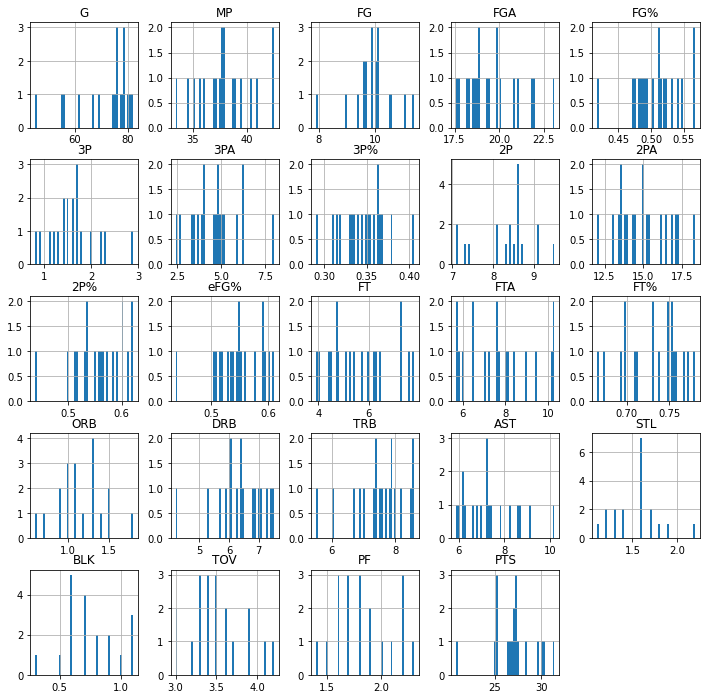

In [18]:
LeB_C_PG_RS.hist(bins=50, figsize=(12,12))

array([[<AxesSubplot:title={'center':'PTS'}>,
        <AxesSubplot:title={'center':'AST'}>],
       [<AxesSubplot:title={'center':'TRB'}>,
        <AxesSubplot:title={'center':'FG'}>],
       [<AxesSubplot:title={'center':'STL'}>,
        <AxesSubplot:title={'center':'TOV'}>]], dtype=object)

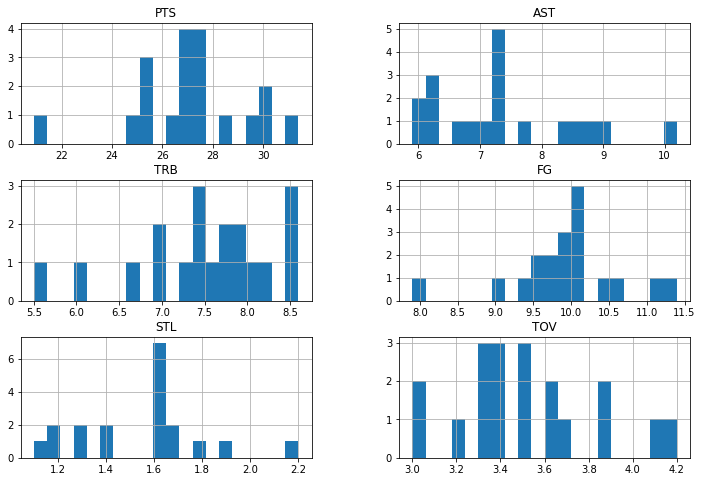

In [19]:
LeB_C_PG_RS[['PTS', 'AST', 'TRB', 'FG', 'STL', 'TOV']].hist(bins=20, figsize=(12, 8))

In [20]:
LeB_C_PG_RS['FG%'].mean()

0.5069473684210527

In [21]:
#trovo le diverse squadre in cui ha giocato
LeB_C_PG_RS['Tm'].value_counts()

CLE    11
LAL     4
MIA     4
Name: Tm, dtype: int64

In [22]:
a1 = LeB_C_PG_RS['3PA'].mean()
TPA = list(LeB_C_PG_RS['3PA'])

a2 = LeB_C_PG_RS['2PA'].mean()
DPA = list(LeB_C_PG_RS['2PA'])

a = max(TPA)
TPA.index(a)

b = min(TPA)
TPA.index(b)

c = max(DPA)
DPA.index(c)

d = min(DPA)
DPA.index(d)

(a, b, c, d)

(8.0, 2.4, 18.3, 12.0)

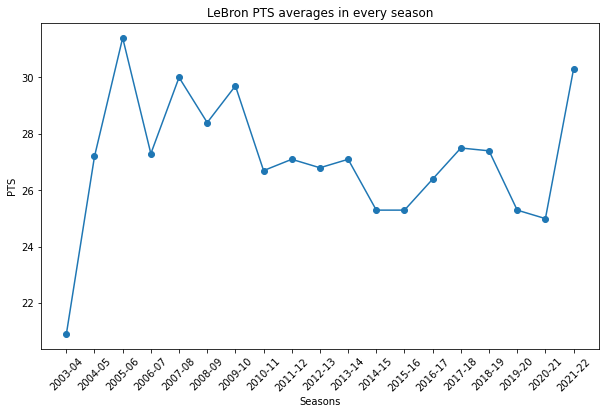

In [23]:
Season = list(LeB_C_PG_RS['Season'])
PTS = list(LeB_C_PG_RS['PTS'])

plt.figure(figsize=(10, 6))
plt.plot(Season, PTS, '-o')
plt.title('LeBron PTS averages in every season')
plt.xlabel('Seasons')
plt.ylabel('PTS')
plt.xticks(rotation=45)
plt.show()

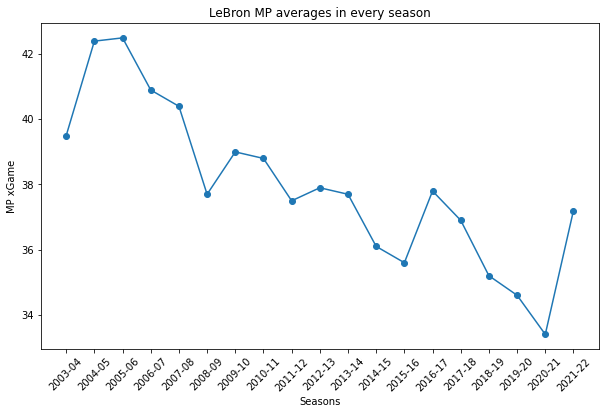

In [24]:
Season = list(LeB_C_PG_RS['Season'])
MP = list(LeB_C_PG_RS['MP'])

plt.figure(figsize=(10, 6))
plt.plot(Season, MP, '-o')
plt.title('LeBron MP averages in every season')
plt.xlabel('Seasons')
plt.ylabel('MP xGame')
plt.xticks(rotation=45)
plt.show()

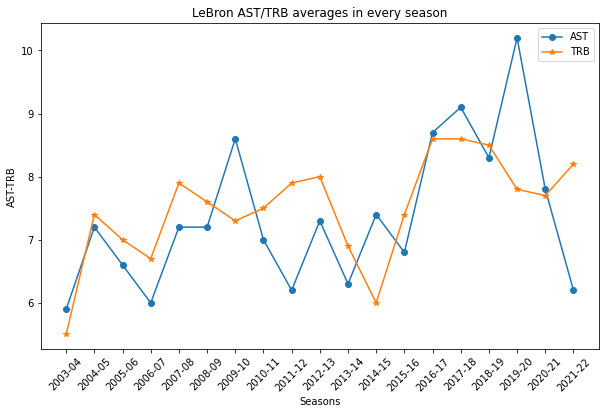

In [25]:
Season = list(LeB_C_PG_RS['Season'])
AST = list(LeB_C_PG_RS['AST'])
TRB = list(LeB_C_PG_RS['TRB'])

plt.figure(figsize=(10, 6))
plt.plot(Season, AST, '-o', label='AST')
plt.plot(Season, TRB, '-*', label='TRB')
plt.title('LeBron AST/TRB averages in every season')
plt.xlabel('Seasons')
plt.ylabel('AST-TRB')
plt.xticks(rotation=45)
plt.legend()
plt.show()

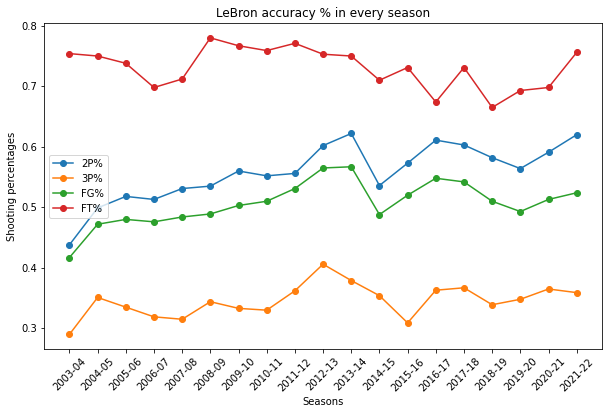

In [26]:
Season = list(LeB_C_PG_RS['Season'])
DPP = list(LeB_C_PG_RS['2P%'])
TPP = list(LeB_C_PG_RS['3P%'])
FGP = list(LeB_C_PG_RS['FG%'])
FTP = list(LeB_C_PG_RS['FT%'])

plt.figure(figsize=(10, 6))
plt.plot(Season, DPP, '-o', label='2P%')
plt.plot(Season, TPP, '-o', label='3P%')
plt.plot(Season, FGP, '-o', label='FG%')
plt.plot(Season, FTP, '-o', label='FT%')
plt.title('LeBron accuracy % in every season')
plt.xlabel('Seasons')
plt.ylabel('Shooting percentages')
plt.legend()
plt.xticks(rotation=45)
plt.show()

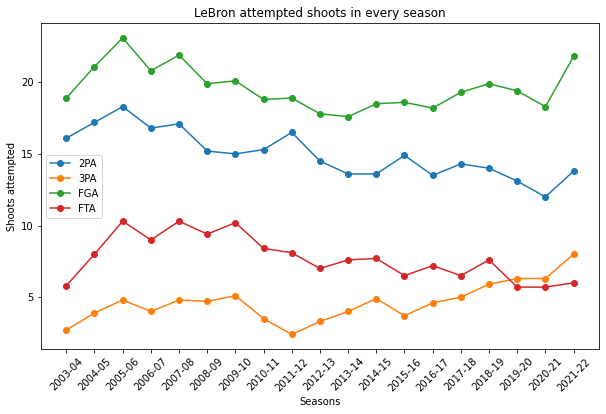

In [27]:
Season = list(LeB_C_PG_RS['Season'])
DPA = list(LeB_C_PG_RS['2PA'])
TPA = list(LeB_C_PG_RS['3PA'])
FGA = list(LeB_C_PG_RS['FGA'])
FTA = list(LeB_C_PG_RS['FTA'])

plt.figure(figsize=(10, 6))
plt.plot(Season, DPA, '-o', label='2PA')
plt.plot(Season, TPA, '-o', label='3PA')
plt.plot(Season, FGA, '-o', label='FGA')
plt.plot(Season, FTA, '-o', label='FTA')
plt.title('LeBron attempted shoots in every season')
plt.xlabel('Seasons')
plt.ylabel('Shoots attempted')
plt.legend()
plt.xticks(rotation=45)
plt.show()

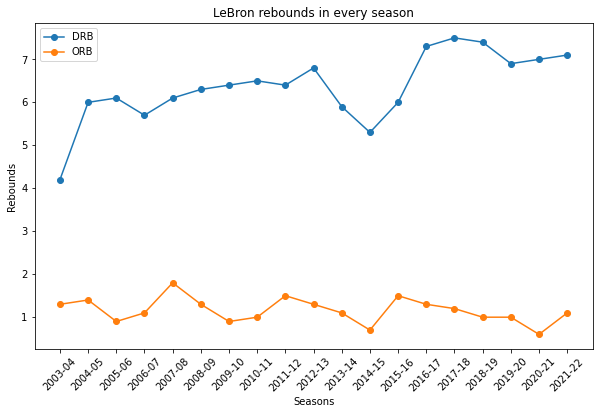

In [28]:
Season = list(LeB_C_PG_RS['Season'])
DRB = list(LeB_C_PG_RS['DRB'])
ORB = list(LeB_C_PG_RS['ORB'])

plt.figure(figsize=(10, 6))
plt.plot(Season, DRB, '-o', label='DRB')
plt.plot(Season, ORB, '-o', label='ORB')
plt.title('LeBron rebounds in every season')
plt.xlabel('Seasons')
plt.ylabel('Rebounds')
plt.legend()
plt.xticks(rotation=45)
plt.show()

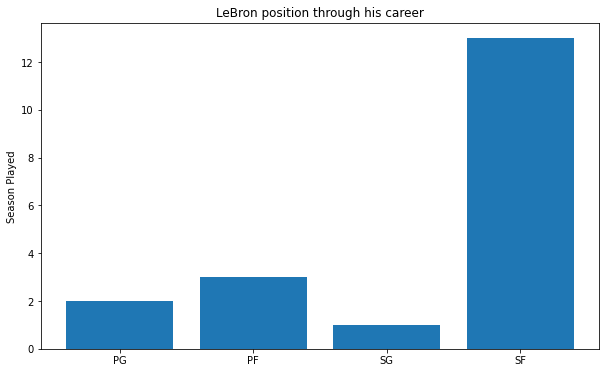

In [29]:
Season = list(LeB_C_PG_RS['Season'])
Position = list(LeB_C_PG_RS['Pos'])
PG = Position.count('PG')
PF = Position.count('PF')
SG = Position.count('SG')
SF = Position.count('SF')

x = ['PG', 'PF', 'SG', 'SF'] 
y = [PG, PF, SG, SF]

plt.figure(figsize=(10, 6))
plt.title('LeBron position through his career')
plt.bar(x, y)  #LeB_C_PG_RS['Pos'].value_counts()
plt.ylabel('Season Played')
plt.show()

Il ruolo di centro non è inserito, in quanto ha cominciato a giocarci da metà stagione quest'anno

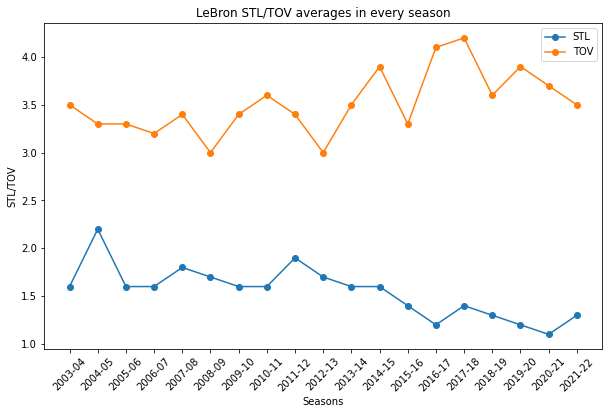

In [30]:
Season = list(LeB_C_PG_RS['Season'])
STL = list(LeB_C_PG_RS['STL'])
TOV = list(LeB_C_PG_RS['TOV'])

plt.figure(figsize=(10, 6))
plt.plot(Season, STL, '-o', label='STL')
plt.plot(Season, TOV, '-o', label='TOV')
plt.title('LeBron STL/TOV averages in every season')
plt.xlabel('Seasons')
plt.ylabel('STL/TOV')
plt.legend()
plt.xticks(rotation=45)
plt.show()

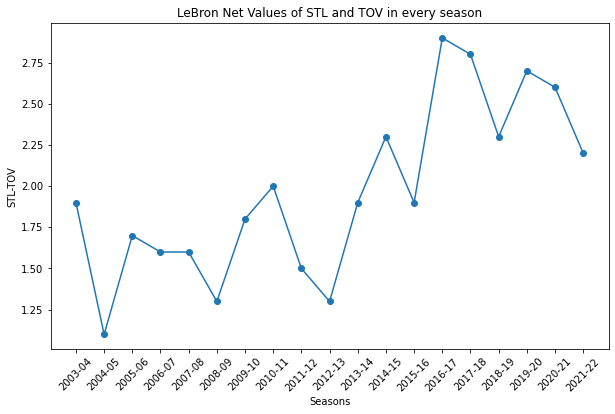

In [31]:
#NET VALUE OF STEELS AND TURNOVERS
#it is obviously negative and means that he gets more turnovers than steels.
#STL - TOV
STL_array = np.array(STL)
TOV_array = np.array(TOV)

plt.figure(figsize=(10, 6))
plt.plot(Season, TOV_array-STL_array, '-o')
plt.title('LeBron Net Values of STL and TOV in every season')
plt.xlabel('Seasons')
plt.ylabel('STL-TOV')
plt.xticks(rotation=45)
plt.show()

In [32]:
a = LeB_C_PG_RS['PTS'].max() 
b = LeB_C_PG_RS['AST'].max()
c = LeB_C_PG_RS['TRB'].max()
d = LeB_C_PG_RS['STL'].max()
e = LeB_C_PG_RS['TOV'].max()
[a, b, c, d, e]

[31.4, 10.2, 8.6, 2.2, 4.2]

In [33]:
a = LeB_C_PG_RS['PTS'].min() 
b = LeB_C_PG_RS['AST'].min()
c = LeB_C_PG_RS['TRB'].min()
d = LeB_C_PG_RS['STL'].min()
e = LeB_C_PG_RS['TOV'].min()
[a, b, c, d, e]

[20.9, 5.9, 5.5, 1.1, 3.0]

In [34]:
a = LeB_C_PG_RS['PTS'].mean() 
b = LeB_C_PG_RS['AST'].mean()
c = LeB_C_PG_RS['TRB'].mean()
d = LeB_C_PG_RS['STL'].mean()
e = LeB_C_PG_RS['TOV'].mean()
[a, b, c, d, e]

[27.110526315789475,
 7.368421052631579,
 7.5,
 1.5473684210526317,
 3.5157894736842112]

In [35]:
LBJ_Stats = LeB_C_PG_RS.sort_values(by='Season')[['Season', 'PTS', 'AST', 'TRB', 'STL', 'TOV', 'FG', '3P', '2P', 'FT']]
LBJ_Stats.set_index('Season', inplace=True)
LBJ_Stats

,PTS,AST,TRB,STL,TOV,FG,3P,2P,FT
Season,,,,,,,,,
2003-04,20.9,5.9,5.5,1.6,3.5,7.9,0.8,7.1,4.4
2004-05,27.2,7.2,7.4,2.2,3.3,9.9,1.4,8.6,6.0
2005-06,31.4,6.6,7.0,1.6,3.3,11.1,1.6,9.5,7.6
2006-07,27.3,6.0,6.7,1.6,3.2,9.9,1.3,8.6,6.3
2007-08,30.0,7.2,7.9,1.8,3.4,10.6,1.5,9.1,7.3
2008-09,28.4,7.2,7.6,1.7,3.0,9.7,1.6,8.1,7.3
2009-10,29.7,8.6,7.3,1.6,3.4,10.1,1.7,8.4,7.8
2010-11,26.7,7.0,7.5,1.6,3.6,9.6,1.2,8.4,6.4
2011-12,27.1,6.2,7.9,1.9,3.4,10.0,0.9,9.1,6.2


In [36]:
x = 'PTS'
ms = LBJ_Stats[x].max()
a = str(LBJ_Stats[LBJ_Stats[x]==ms].index)[8:15]

In [37]:
ms1 = LBJ_Stats['AST'].max()
b = str(LBJ_Stats[LBJ_Stats['AST']==ms1].index)[8:15]

In [38]:
ms2 = LBJ_Stats['TRB'].max()
c = str(LBJ_Stats[LBJ_Stats['TRB']==ms2].index)[8:23]

In [39]:
ms3 = LBJ_Stats['STL'].max()
d = LBJ_Stats[LBJ_Stats['STL']==ms3].index

In [40]:
[ms, ms1, ms2, ms3]
a

'2005-06'

In [41]:
LBJ_Stats['PTS'].max() #index del max da trovare e da fare per altre stats

31.4

In [42]:
LeB_C_PG_RS.columns.drop(['Season', 'Tm', 'Pos']).tolist()

['G',
 'MP',
 'FG',
 'FGA',
 'FG%',
 '3P',
 '3PA',
 '3P%',
 '2P',
 '2PA',
 '2P%',
 'eFG%',
 'FT',
 'FTA',
 'FT%',
 'ORB',
 'DRB',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS']

In [43]:
LeB_C_PG_RS.groupby(by='Pos').mean()

,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Pos,,,,,,,,,,,,,,,,,,,,,
PF,78.333333,37.500000,10.200000,18.233333,0.558000,1.566667,4.100000,0.384000,8.600000,14.133333,...,0.744667,1.200000,6.733333,7.833333,7.566667,1.566667,0.70,3.566667,1.566667,27.133333
PG,56.000000,34.000000,9.500000,18.850000,0.503000,2.250000,6.300000,0.356500,7.250000,12.550000,...,0.695500,0.800000,6.950000,7.750000,9.000000,1.150000,0.55,3.800000,1.700000,25.150000
SF,72.307692,38.546154,10.076923,20.123077,0.502692,1.584615,4.638462,0.339462,8.515385,15.476923,...,0.731615,1.192308,6.353846,7.538462,7.184615,1.600000,0.80,3.461538,1.923077,27.884615
SG,79.000000,39.500000,7.900000,18.900000,0.417000,0.800000,2.700000,0.290000,7.100000,16.100000,...,0.754000,1.300000,4.200000,5.500000,5.900000,1.600000,0.70,3.500000,1.900000,20.900000


## Totals LeBron

In [44]:
LeBron_Career_Totals_RS = pd.DataFrame(data[2])

In [45]:
for el in LeBron_Career_Totals_RS:
  if(el != "Season" and el != "Pos"  and el != "Tm" and el != "Lg"):
    LeBron_Career_Totals_RS[el] = pd.to_numeric(LeBron_Career_Totals_RS[el])

In [46]:
LeBron_Career_Totals_RS

,Season,Age,Tm,Lg,Pos,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Unnamed: 30,Trp Dbl
0,2003-04,19.0,CLE,NBA,SG,79.0,79.0,3122.0,622.0,1492.0,...,333.0,432.0,465.0,130.0,58.0,273.0,149.0,1654.0,NaN,0.0
1,2004-05,20.0,CLE,NBA,SF,80.0,80.0,3388.0,795.0,1684.0,...,477.0,588.0,577.0,177.0,52.0,262.0,146.0,2175.0,NaN,4.0
2,2005-06,21.0,CLE,NBA,SF,79.0,79.0,3361.0,875.0,1823.0,...,481.0,556.0,521.0,123.0,66.0,260.0,181.0,2478.0,NaN,5.0
3,2006-07,22.0,CLE,NBA,SF,78.0,78.0,3190.0,772.0,1621.0,...,443.0,526.0,470.0,125.0,55.0,250.0,171.0,2132.0,NaN,1.0
4,2007-08,23.0,CLE,NBA,SF,75.0,74.0,3027.0,794.0,1642.0,...,459.0,592.0,539.0,138.0,81.0,255.0,165.0,2250.0,NaN,7.0
5,2008-09,24.0,CLE,NBA,SF,81.0,81.0,3054.0,789.0,1613.0,...,507.0,613.0,587.0,137.0,93.0,241.0,139.0,2304.0,NaN,7.0
6,2009-10,25.0,CLE,NBA,SF,76.0,76.0,2966.0,768.0,1528.0,...,483.0,554.0,651.0,125.0,77.0,261.0,119.0,2258.0,NaN,4.0
7,2010-11,26.0,MIA,NBA,SF,79.0,79.0,3063.0,758.0,1485.0,...,510.0,590.0,554.0,124.0,50.0,284.0,163.0,2111.0,NaN,4.0
8,2011-12,27.0,MIA,NBA,SF,62.0,62.0,2326.0,621.0,1169.0,...,398.0,492.0,387.0,115.0,50.0,213.0,96.0,1683.0,NaN,0.0
9,2012-13,28.0,MIA,NBA,PF,76.0,76.0,2877.0,765.0,1354.0,...,513.0,610.0,551.0,129.0,67.0,226.0,110.0,2036.0,NaN,4.0


In [47]:
LeB_C_Tot_RS1 = LeBron_Career_Totals_RS.drop(labels=range(19, 24), axis=0)

In [48]:
LeB_C_Tot_RS = LeB_C_Tot_RS1.drop(labels=['Lg', 'Age', 'GS', 'Unnamed: 30', 'Trp Dbl'], axis=1)

In [49]:
LeB_C_Tot_RS

,Season,Tm,Pos,G,MP,FG,FGA,FG%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2003-04,CLE,SG,79.0,3122.0,622.0,1492.0,0.417,63.0,217.0,...,0.754,99.0,333.0,432.0,465.0,130.0,58.0,273.0,149.0,1654.0
1,2004-05,CLE,SF,80.0,3388.0,795.0,1684.0,0.472,108.0,308.0,...,0.750,111.0,477.0,588.0,577.0,177.0,52.0,262.0,146.0,2175.0
2,2005-06,CLE,SF,79.0,3361.0,875.0,1823.0,0.480,127.0,379.0,...,0.738,75.0,481.0,556.0,521.0,123.0,66.0,260.0,181.0,2478.0
3,2006-07,CLE,SF,78.0,3190.0,772.0,1621.0,0.476,99.0,310.0,...,0.698,83.0,443.0,526.0,470.0,125.0,55.0,250.0,171.0,2132.0
4,2007-08,CLE,SF,75.0,3027.0,794.0,1642.0,0.484,113.0,359.0,...,0.712,133.0,459.0,592.0,539.0,138.0,81.0,255.0,165.0,2250.0
5,2008-09,CLE,SF,81.0,3054.0,789.0,1613.0,0.489,132.0,384.0,...,0.780,106.0,507.0,613.0,587.0,137.0,93.0,241.0,139.0,2304.0
6,2009-10,CLE,SF,76.0,2966.0,768.0,1528.0,0.503,129.0,387.0,...,0.767,71.0,483.0,554.0,651.0,125.0,77.0,261.0,119.0,2258.0
7,2010-11,MIA,SF,79.0,3063.0,758.0,1485.0,0.510,92.0,279.0,...,0.759,80.0,510.0,590.0,554.0,124.0,50.0,284.0,163.0,2111.0
8,2011-12,MIA,SF,62.0,2326.0,621.0,1169.0,0.531,54.0,149.0,...,0.771,94.0,398.0,492.0,387.0,115.0,50.0,213.0,96.0,1683.0
9,2012-13,MIA,PF,76.0,2877.0,765.0,1354.0,0.565,103.0,254.0,...,0.753,97.0,513.0,610.0,551.0,129.0,67.0,226.0,110.0,2036.0


In [50]:
LeB_C_Tot_RS.to_csv('df_LBJ_Tot_Stats_final.csv', index=False)

In [51]:
LeB_C_Tot_RS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 0 to 18
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Season  19 non-null     object 
 1   Tm      19 non-null     object 
 2   Pos     19 non-null     object 
 3   G       19 non-null     float64
 4   MP      19 non-null     float64
 5   FG      19 non-null     float64
 6   FGA     19 non-null     float64
 7   FG%     19 non-null     float64
 8   3P      19 non-null     float64
 9   3PA     19 non-null     float64
 10  3P%     19 non-null     float64
 11  2P      19 non-null     float64
 12  2PA     19 non-null     float64
 13  2P%     19 non-null     float64
 14  eFG%    19 non-null     float64
 15  FT      19 non-null     float64
 16  FTA     19 non-null     float64
 17  FT%     19 non-null     float64
 18  ORB     19 non-null     float64
 19  DRB     19 non-null     float64
 20  TRB     19 non-null     float64
 21  AST     19 non-null     float64
 22  STL 

In [52]:
LeB_C_Tot_RS.describe()

,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,...,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,71.894737,2744.157895,712.789474,1411.842105,0.506947,112.631579,325.578947,0.345684,600.157895,1086.263158,...,0.731053,84.263158,453.105263,537.368421,528.684211,112.421053,54.789474,252.000000,132.421053,1950.631579
std,10.332767,507.483909,111.777845,237.731236,0.036055,27.201329,73.669921,0.026967,108.481060,231.234091,...,0.033763,24.785395,72.395438,87.139869,107.263462,29.524596,18.237869,40.618824,28.129296,335.339332
min,45.000000,1504.000000,422.000000,823.000000,0.417000,54.000000,149.000000,0.290000,318.000000,538.000000,...,0.665000,29.000000,317.000000,346.000000,349.000000,48.000000,25.000000,168.000000,70.000000,1126.000000
25%,68.000000,2409.500000,632.000000,1291.000000,0.486000,101.000000,283.500000,0.331500,531.500000,971.000000,...,0.704000,68.500000,403.000000,478.500000,467.500000,98.000000,46.500000,233.500000,118.500000,1696.500000
50%,76.000000,2902.000000,758.000000,1416.000000,0.510000,113.000000,327.000000,0.348000,650.000000,1134.000000,...,0.738000,83.000000,459.000000,554.000000,521.000000,121.000000,52.000000,260.000000,135.000000,2036.000000
75%,79.000000,3058.500000,780.500000,1596.500000,0.527500,128.000000,381.500000,0.362500,669.500000,1252.000000,...,0.755000,98.000000,495.000000,591.000000,582.000000,127.000000,66.500000,271.000000,147.500000,2212.500000
max,82.000000,3388.000000,875.000000,1823.000000,0.567000,161.000000,448.000000,0.406000,748.000000,1444.000000,...,0.780000,133.000000,612.000000,709.000000,747.000000,177.000000,93.000000,347.000000,181.000000,2478.000000


In [53]:
New_LeB_C_Tot_RS = LeB_C_Tot_RS.drop(['ORB', 'DRB', 'PF', 'FG%', '2P%', '3P%', 'FT%', 'Tm', 'Season'], axis=1)
New_LeB_C_Tot_RS

,Pos,G,MP,FG,FGA,3P,3PA,2P,2PA,eFG%,FT,FTA,TRB,AST,STL,BLK,TOV,PTS
0,SG,79.0,3122.0,622.0,1492.0,63.0,217.0,559.0,1275.0,0.438,347.0,460.0,432.0,465.0,130.0,58.0,273.0,1654.0
1,SF,80.0,3388.0,795.0,1684.0,108.0,308.0,687.0,1376.0,0.504,477.0,636.0,588.0,577.0,177.0,52.0,262.0,2175.0
2,SF,79.0,3361.0,875.0,1823.0,127.0,379.0,748.0,1444.0,0.515,601.0,814.0,556.0,521.0,123.0,66.0,260.0,2478.0
3,SF,78.0,3190.0,772.0,1621.0,99.0,310.0,673.0,1311.0,0.507,489.0,701.0,526.0,470.0,125.0,55.0,250.0,2132.0
4,SF,75.0,3027.0,794.0,1642.0,113.0,359.0,681.0,1283.0,0.518,549.0,771.0,592.0,539.0,138.0,81.0,255.0,2250.0
5,SF,81.0,3054.0,789.0,1613.0,132.0,384.0,657.0,1229.0,0.530,594.0,762.0,613.0,587.0,137.0,93.0,241.0,2304.0
6,SF,76.0,2966.0,768.0,1528.0,129.0,387.0,639.0,1141.0,0.545,593.0,773.0,554.0,651.0,125.0,77.0,261.0,2258.0
7,SF,79.0,3063.0,758.0,1485.0,92.0,279.0,666.0,1206.0,0.541,503.0,663.0,590.0,554.0,124.0,50.0,284.0,2111.0
8,SF,62.0,2326.0,621.0,1169.0,54.0,149.0,567.0,1020.0,0.554,387.0,502.0,492.0,387.0,115.0,50.0,213.0,1683.0
9,PF,76.0,2877.0,765.0,1354.0,103.0,254.0,662.0,1100.0,0.603,403.0,535.0,610.0,551.0,129.0,67.0,226.0,2036.0


In [54]:
New_LeB_C_Tot_RS.describe()

,G,MP,FG,FGA,3P,3PA,2P,2PA,eFG%,FT,FTA,TRB,AST,STL,BLK,TOV,PTS
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,71.894737,2744.157895,712.789474,1411.842105,112.631579,325.578947,600.157895,1086.263158,0.547947,412.421053,561.736842,537.368421,528.684211,112.421053,54.789474,252.000000,1950.631579
std,10.332767,507.483909,111.777845,237.731236,27.201329,73.669921,108.481060,231.234091,0.041997,122.863210,157.921514,87.139869,107.263462,29.524596,18.237869,40.618824,335.339332
min,45.000000,1504.000000,422.000000,823.000000,54.000000,149.000000,318.000000,538.000000,0.438000,178.000000,255.000000,346.000000,349.000000,48.000000,25.000000,168.000000,1126.000000
25%,68.000000,2409.500000,632.000000,1291.000000,101.000000,283.500000,531.500000,971.000000,0.524000,352.500000,475.500000,478.500000,467.500000,98.000000,46.500000,233.500000,1696.500000
50%,76.000000,2902.000000,758.000000,1416.000000,113.000000,327.000000,650.000000,1134.000000,0.550000,388.000000,531.000000,554.000000,521.000000,121.000000,52.000000,260.000000,2036.000000
75%,79.000000,3058.500000,780.500000,1596.500000,128.000000,381.500000,669.500000,1252.000000,0.583000,496.000000,682.000000,591.000000,582.000000,127.000000,66.500000,271.000000,2212.500000
max,82.000000,3388.000000,875.000000,1823.000000,161.000000,448.000000,748.000000,1444.000000,0.610000,601.000000,814.000000,709.000000,747.000000,177.000000,93.000000,347.000000,2478.000000


array([[<AxesSubplot:title={'center':'PTS'}>,
        <AxesSubplot:title={'center':'AST'}>],
       [<AxesSubplot:title={'center':'TRB'}>,
        <AxesSubplot:title={'center':'FG'}>],
       [<AxesSubplot:title={'center':'STL'}>,
        <AxesSubplot:title={'center':'TOV'}>]], dtype=object)

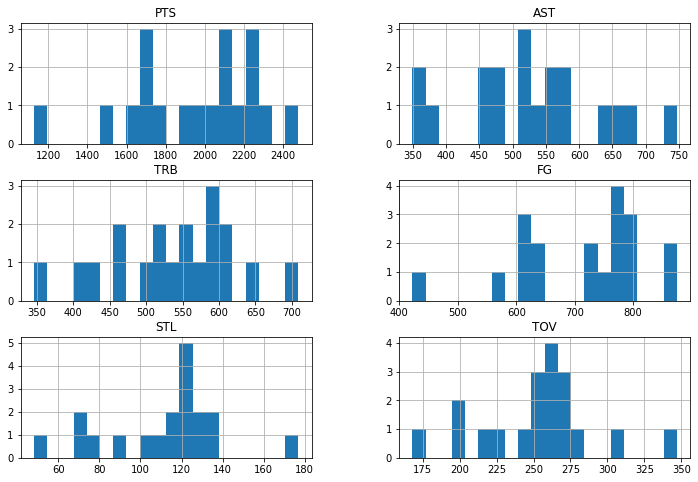

In [55]:
New_LeB_C_Tot_RS[['PTS', 'AST', 'TRB', 'FG', 'STL', 'TOV']].hist(bins=20, figsize=(12, 8))

In [56]:
New_LeB_C_Tot_RS.corr()

,G,MP,FG,FGA,3P,3PA,2P,2PA,eFG%,FT,FTA,TRB,AST,STL,BLK,TOV,PTS
G,1.000000,0.958686,0.876671,0.884206,-0.026237,0.039787,0.909892,0.896374,-0.322765,0.745027,0.740999,0.730465,0.634808,0.820000,0.544383,0.774486,0.855275
MP,0.958686,1.000000,0.880413,0.943678,-0.069250,0.012881,0.924533,0.966089,-0.434293,0.814171,0.815319,0.656055,0.504641,0.884661,0.562101,0.673330,0.879614
FG,0.876671,0.880413,1.000000,0.899677,0.241088,0.279842,0.969938,0.835799,-0.057566,0.795942,0.802487,0.851379,0.608661,0.721164,0.609849,0.661547,0.977832
FGA,0.884206,0.943678,0.899677,1.000000,0.116547,0.241931,0.897795,0.951020,-0.475488,0.833000,0.843483,0.647333,0.513277,0.802848,0.668100,0.606957,0.914427
3P,-0.026237,-0.069250,0.241088,0.116547,1.000000,0.960619,-0.002333,-0.186227,0.414814,-0.002395,0.016336,0.266527,0.422340,-0.237553,0.189763,0.181517,0.240961
3PA,0.039787,0.012881,0.279842,0.241931,0.960619,1.000000,0.047474,-0.069866,0.206852,0.096219,0.125584,0.250215,0.431303,-0.188464,0.275107,0.207267,0.299733
2P,0.909892,0.924533,0.969938,0.897795,-0.002333,0.047474,1.000000,0.907896,-0.163329,0.820732,0.822779,0.810422,0.521258,0.802646,0.580800,0.636137,0.947129
2PA,0.896374,0.966089,0.835799,0.951020,-0.186227,-0.069866,0.907896,1.000000,-0.554750,0.825751,0.827173,0.585804,0.390288,0.885450,0.599224,0.557977,0.844627
eFG%,-0.322765,-0.434293,-0.057566,-0.475488,0.414814,0.206852,-0.163329,-0.554750,1.000000,-0.332725,-0.338060,0.201121,0.062980,-0.461161,-0.288118,-0.094511,-0.126634
FT,0.745027,0.814171,0.795942,0.833000,-0.002395,0.096219,0.820732,0.825751,-0.332725,1.000000,0.989611,0.541256,0.367185,0.777285,0.689936,0.380886,0.896810


<AxesSubplot:>

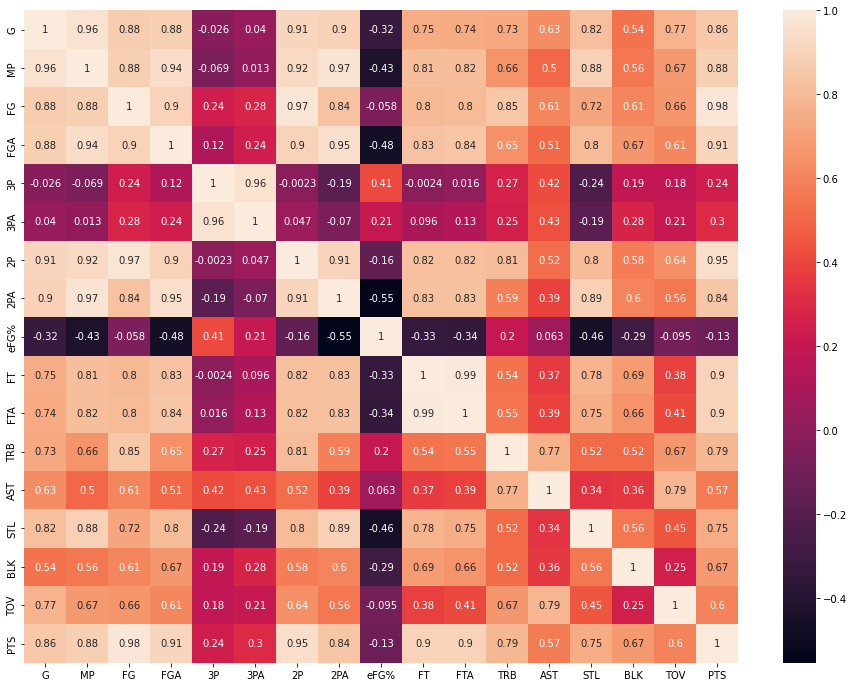

In [57]:
plt.figure(figsize=(16, 12))
sb.heatmap(New_LeB_C_Tot_RS.corr(), annot=True)

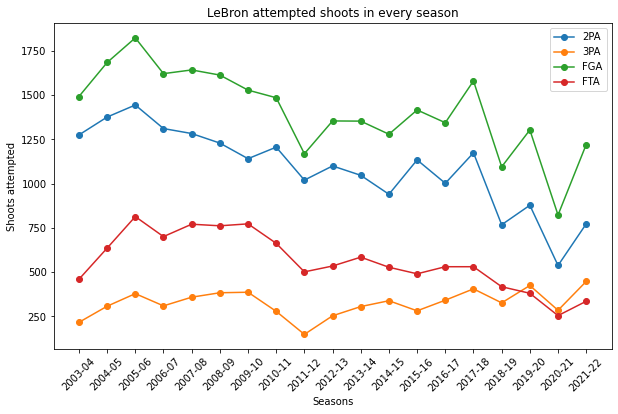

In [58]:
Season = list(LeB_C_Tot_RS['Season'])
DPA = list(LeB_C_Tot_RS['2PA'])
TPA = list(LeB_C_Tot_RS['3PA'])
FGA = list(LeB_C_Tot_RS['FGA'])
FTA = list(LeB_C_Tot_RS['FTA'])

plt.figure(figsize=(10, 6))
plt.plot(Season, DPA, '-o', label='2PA')
plt.plot(Season, TPA, '-o', label='3PA')
plt.plot(Season, FGA, '-o', label='FGA')
plt.plot(Season, FTA, '-o', label='FTA')
plt.title('LeBron attempted shoots in every season')
plt.xlabel('Seasons')
plt.ylabel('Shoots attempted')
plt.legend()
plt.xticks(rotation=45)
plt.show()

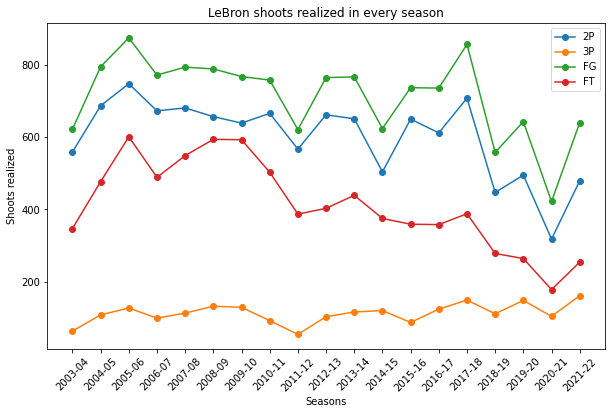

In [59]:
Season = list(LeB_C_Tot_RS['Season'])
DP = list(LeB_C_Tot_RS['2P'])
TP = list(LeB_C_Tot_RS['3P'])
FG = list(LeB_C_Tot_RS['FG'])
FT = list(LeB_C_Tot_RS['FT'])

plt.figure(figsize=(10, 6))
plt.plot(Season, DP, '-o', label='2P')
plt.plot(Season, TP, '-o', label='3P')
plt.plot(Season, FG, '-o', label='FG')
plt.plot(Season, FT, '-o', label='FT')
plt.title('LeBron shoots realized in every season')
plt.xlabel('Seasons')
plt.ylabel('Shoots realized')
plt.legend()
plt.xticks(rotation=45)
plt.show()

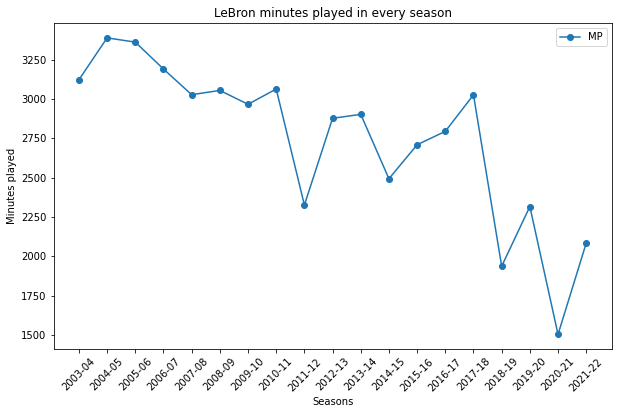

In [60]:
Season = list(LeB_C_Tot_RS['Season'])
MP = list(LeB_C_Tot_RS['MP'])

plt.figure(figsize=(10, 6))
plt.plot(Season, MP, '-o', label='MP')
plt.title('LeBron minutes played in every season')
plt.xlabel('Seasons')
plt.ylabel('Minutes played')
plt.legend()
plt.xticks(rotation=45)
plt.show()

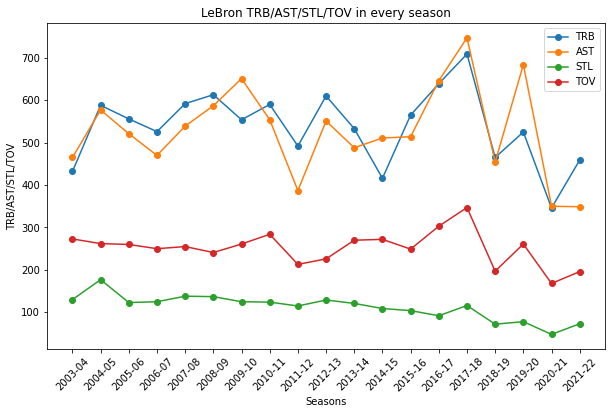

In [61]:
Season = list(LeB_C_Tot_RS['Season'])
TRB = list(LeB_C_Tot_RS['TRB'])
AST = list(LeB_C_Tot_RS['AST'])
STL = list(LeB_C_Tot_RS['STL'])
TOV = list(LeB_C_Tot_RS['TOV'])

plt.figure(figsize=(10, 6))
plt.plot(Season, TRB, '-o', label='TRB')
plt.plot(Season, AST, '-o', label='AST')
plt.plot(Season, STL, '-o', label='STL')
plt.plot(Season, TOV, '-o', label='TOV')
plt.title('LeBron TRB/AST/STL/TOV in every season')
plt.xlabel('Seasons')
plt.ylabel('TRB/AST/STL/TOV')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [62]:
#minuti totali per stagione
a = LeB_C_Tot_RS['MP'].max()
b = LeB_C_Tot_RS['MP'].mean()
c = LeB_C_Tot_RS['MP'].min()
[a, b, c]

[3388.0, 2744.157894736842, 1504.0]

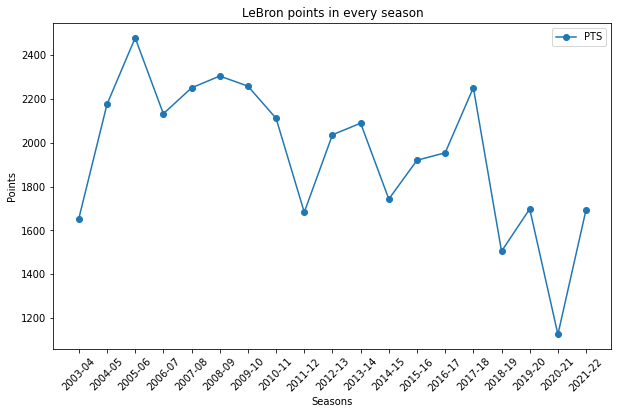

In [63]:
Season = list(LeB_C_Tot_RS['Season'])
PTS = list(LeB_C_Tot_RS['PTS'])

plt.figure(figsize=(10, 6))
plt.plot(Season, PTS, '-o', label='PTS')
plt.title('LeBron points in every season')
plt.xlabel('Seasons')
plt.ylabel('Points')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [64]:
#sommare punti a seconda della squadra e vedere con quale squadra ha una media punti più alta

a = LeB_C_Tot_RS['PTS'][0]
b = LeB_C_Tot_RS['PTS'][1]
c = LeB_C_Tot_RS['PTS'][2]
d = LeB_C_Tot_RS['PTS'][3]
e = LeB_C_Tot_RS['PTS'][4]
f = LeB_C_Tot_RS['PTS'][5]
g = LeB_C_Tot_RS['PTS'][6]
h = LeB_C_Tot_RS['PTS'][7]
i = LeB_C_Tot_RS['PTS'][8]
j = LeB_C_Tot_RS['PTS'][9]
k = LeB_C_Tot_RS['PTS'][10]
l = LeB_C_Tot_RS['PTS'][11]
m = LeB_C_Tot_RS['PTS'][12]
n = LeB_C_Tot_RS['PTS'][13]
o = LeB_C_Tot_RS['PTS'][14]
p = LeB_C_Tot_RS['PTS'][15]
q = LeB_C_Tot_RS['PTS'][16]
r = LeB_C_Tot_RS['PTS'][17]
s = LeB_C_Tot_RS['PTS'][18]

PTS_CLE = [a, b, c, d, e, f, g, l, m, n, o]
PTS_MIA = [h, i, j, k]
PTS_LAL = [p, q, r, s]

In [65]:
a = sum(PTS_CLE)/11
b = sum(PTS_MIA)/4
c = sum(PTS_LAL)/4
[a, b, c] #average points per season for every team

[2101.7272727272725, 1979.75, 1506.0]

In [66]:
#punti totali per stagione
a = LeB_C_Tot_RS['PTS'].max()
b = LeB_C_Tot_RS['PTS'].mean()
c = LeB_C_Tot_RS['PTS'].min()
[a, b, c]

[2478.0, 1950.6315789473683, 1126.0]

In [67]:
# Season = list(LeB_C_Tot_RS['Season'])
# TD = list(LeB_C_Tot_RS['Trp Dbl'])

# plt.figure(figsize=(10, 6))
# plt.plot(Season, TD, '-o', label='Trp Dbl')
# plt.title('LeBron triple double in every season')
# plt.xlabel('Seasons')
# plt.ylabel('Triple Double')
# plt.legend()
# plt.xticks(rotation=45)
# plt.show()

In [68]:
# a = LeB_C_Tot_RS['Trp Dbl'].max()
# b = LeB_C_Tot_RS['Trp Dbl'].mean()
# c = LeB_C_Tot_RS['Trp Dbl'].min()
# [a, b, c]

In [69]:
LBJ_Stats_Tot = LeB_C_Tot_RS.sort_values(by='Season')[['Season', 'PTS', 'AST', 'TRB', 'STL', 'TOV', 'FG', '3P', '2P', 'FT']]
LBJ_Stats_Tot.set_index('Season', inplace=True)
LBJ_Stats_Tot

,PTS,AST,TRB,STL,TOV,FG,3P,2P,FT
Season,,,,,,,,,
2003-04,1654.0,465.0,432.0,130.0,273.0,622.0,63.0,559.0,347.0
2004-05,2175.0,577.0,588.0,177.0,262.0,795.0,108.0,687.0,477.0
2005-06,2478.0,521.0,556.0,123.0,260.0,875.0,127.0,748.0,601.0
2006-07,2132.0,470.0,526.0,125.0,250.0,772.0,99.0,673.0,489.0
2007-08,2250.0,539.0,592.0,138.0,255.0,794.0,113.0,681.0,549.0
2008-09,2304.0,587.0,613.0,137.0,241.0,789.0,132.0,657.0,594.0
2009-10,2258.0,651.0,554.0,125.0,261.0,768.0,129.0,639.0,593.0
2010-11,2111.0,554.0,590.0,124.0,284.0,758.0,92.0,666.0,503.0
2011-12,1683.0,387.0,492.0,115.0,213.0,621.0,54.0,567.0,387.0


In [70]:
LBJ_Stats_Tot['PTS'].max() #index del max da trovare e da fare per altre stats

2478.0

In [71]:
massimo = LBJ_Stats_Tot['PTS'].max()
massimo

2478.0

In [72]:
LBJ_Stats_Tot[LBJ_Stats_Tot['PTS']==massimo].index

Index(['2005-06'], dtype='object', name='Season')

## Injuries

In [73]:
#LeBron_Career_Injuries = pd.read_html('https://www.foxsports.com/nba/lebron-james-player-injuries')

In [74]:
LeBron_Career_Injuries = pd.read_csv('LeBron_Injuries.csv', delimiter=';')

In [75]:
LeBron_Career_Injuries

,DATE,DESCRIPTION,NR. MATCH MISSED
0,02/12/2022,Knee,0
1,02/07/2022,Knee,0
2,01/27/2022,Knee,5
3,01/22/2022,Abdomen,0
4,01/20/2022,Abdominal,0
...,...,...,...
100,02/11/2019,Undisclosed,0
101,02/09/2019,Load Management,0
102,02/06/2019,Load Management,0
103,02/04/2019,Rest,1


## Predictive model

In [76]:
#Time needed to overcome:
# Points: Kareem-Abdul Jabbar (38387) --> LeBron (37062)
# Minutes: Kareem-Abdul Jabbar (57446) --> LeBron (52139)
# Games: Robert Parish (1611) --> LeBron (1366)
# Field Goals Missed: Bryant (14481) --> LeBron (13282)

In [77]:
LeB_C_PG_RS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 0 to 18
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Season  19 non-null     object 
 1   Tm      19 non-null     object 
 2   Pos     19 non-null     object 
 3   G       19 non-null     float64
 4   MP      19 non-null     float64
 5   FG      19 non-null     float64
 6   FGA     19 non-null     float64
 7   FG%     19 non-null     float64
 8   3P      19 non-null     float64
 9   3PA     19 non-null     float64
 10  3P%     19 non-null     float64
 11  2P      19 non-null     float64
 12  2PA     19 non-null     float64
 13  2P%     19 non-null     float64
 14  eFG%    19 non-null     float64
 15  FT      19 non-null     float64
 16  FTA     19 non-null     float64
 17  FT%     19 non-null     float64
 18  ORB     19 non-null     float64
 19  DRB     19 non-null     float64
 20  TRB     19 non-null     float64
 21  AST     19 non-null     float64
 22  STL 

In [78]:
LeB_C_PG_RS1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 0 to 18
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Season  19 non-null     object 
 1   Age     19 non-null     float64
 2   Tm      19 non-null     object 
 3   Lg      19 non-null     object 
 4   Pos     19 non-null     object 
 5   G       19 non-null     float64
 6   GS      19 non-null     float64
 7   MP      19 non-null     float64
 8   FG      19 non-null     float64
 9   FGA     19 non-null     float64
 10  FG%     19 non-null     float64
 11  3P      19 non-null     float64
 12  3PA     19 non-null     float64
 13  3P%     19 non-null     float64
 14  2P      19 non-null     float64
 15  2PA     19 non-null     float64
 16  2P%     19 non-null     float64
 17  eFG%    19 non-null     float64
 18  FT      19 non-null     float64
 19  FTA     19 non-null     float64
 20  FT%     19 non-null     float64
 21  ORB     19 non-null     float64
 22  DRB 

In [79]:
new_datas = LeB_C_PG_RS1.drop(columns=['Season', 'Lg', 'PF', 'TOV', 'BLK', 'AST', 'STL', 'TRB', 'DRB', 'ORB', 'eFG%', 'GS', 'Pos', 'Tm'])
new_datas

,Age,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,PTS
0,19.0,79.0,39.5,7.9,18.9,0.417,0.8,2.7,0.290,7.1,16.1,0.438,4.4,5.8,0.754,20.9
1,20.0,80.0,42.4,9.9,21.1,0.472,1.4,3.9,0.351,8.6,17.2,0.499,6.0,8.0,0.750,27.2
2,21.0,79.0,42.5,11.1,23.1,0.480,1.6,4.8,0.335,9.5,18.3,0.518,7.6,10.3,0.738,31.4
3,22.0,78.0,40.9,9.9,20.8,0.476,1.3,4.0,0.319,8.6,16.8,0.513,6.3,9.0,0.698,27.3
4,23.0,75.0,40.4,10.6,21.9,0.484,1.5,4.8,0.315,9.1,17.1,0.531,7.3,10.3,0.712,30.0
5,24.0,81.0,37.7,9.7,19.9,0.489,1.6,4.7,0.344,8.1,15.2,0.535,7.3,9.4,0.780,28.4
6,25.0,76.0,39.0,10.1,20.1,0.503,1.7,5.1,0.333,8.4,15.0,0.560,7.8,10.2,0.767,29.7
7,26.0,79.0,38.8,9.6,18.8,0.510,1.2,3.5,0.330,8.4,15.3,0.552,6.4,8.4,0.759,26.7
8,27.0,62.0,37.5,10.0,18.9,0.531,0.9,2.4,0.362,9.1,16.5,0.556,6.2,8.1,0.771,27.1
9,28.0,76.0,37.9,10.1,17.8,0.565,1.4,3.3,0.406,8.7,14.5,0.602,5.3,7.0,0.753,26.8


In [80]:
new_datas['Tm Misc'] = [-12, 2, 22, 22, 8, 50, 40, 34, 26, 50, 26, 24, 32, 20, 18, -8, 33, 12, -16]

In [81]:
LeB_C_Tot_RS1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 0 to 18
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Season       19 non-null     object 
 1   Age          19 non-null     float64
 2   Tm           19 non-null     object 
 3   Lg           19 non-null     object 
 4   Pos          19 non-null     object 
 5   G            19 non-null     float64
 6   GS           19 non-null     float64
 7   MP           19 non-null     float64
 8   FG           19 non-null     float64
 9   FGA          19 non-null     float64
 10  FG%          19 non-null     float64
 11  3P           19 non-null     float64
 12  3PA          19 non-null     float64
 13  3P%          19 non-null     float64
 14  2P           19 non-null     float64
 15  2PA          19 non-null     float64
 16  2P%          19 non-null     float64
 17  eFG%         19 non-null     float64
 18  FT           19 non-null     float64
 19  FTA       

In [82]:
new_data = LeB_C_Tot_RS1.drop(columns=['Season', 'Lg', 'GS', 'Unnamed: 30', 'Trp Dbl', 'PF', 'TOV', 'STL', 'BLK', 'DRB', 'ORB', 'TRB', 'AST', 'Pos', 'eFG%', 'Tm', 'FG', 'FGA', '3P', '3PA', '2P', '2PA', 'FT', 'FTA'])
new_data

,Age,G,MP,FG%,3P%,2P%,FT%,PTS
0,19.0,79.0,3122.0,0.417,0.290,0.438,0.754,1654.0
1,20.0,80.0,3388.0,0.472,0.351,0.499,0.750,2175.0
2,21.0,79.0,3361.0,0.480,0.335,0.518,0.738,2478.0
3,22.0,78.0,3190.0,0.476,0.319,0.513,0.698,2132.0
4,23.0,75.0,3027.0,0.484,0.315,0.531,0.712,2250.0
5,24.0,81.0,3054.0,0.489,0.344,0.535,0.780,2304.0
6,25.0,76.0,2966.0,0.503,0.333,0.560,0.767,2258.0
7,26.0,79.0,3063.0,0.510,0.330,0.552,0.759,2111.0
8,27.0,62.0,2326.0,0.531,0.362,0.556,0.771,1683.0
9,28.0,76.0,2877.0,0.565,0.406,0.602,0.753,2036.0


In [83]:
new_data['Tm Misc'] = [-12, 2, 22, 22, 8, 50, 40, 34, 26, 50, 26, 24, 32, 20, 18, -8, 33, 12, -16]
#variable including the net difference between victories and losses in the regular season

In [84]:
X_train, X_test, y_train, y_test = train_test_split(new_data.drop(columns='PTS'), new_data['PTS'], test_size=0.5)

In [85]:
reg = LinearRegression(fit_intercept=False).fit(X_train, y_train)

In [86]:
print(reg.intercept_)
print(reg.coef_)
print(mean_squared_error(reg.predict(X_train),y_train))
print(mean_squared_error(reg.predict(X_test),y_test))
print(reg.score(X_train,y_train))
print(reg.score(X_test,y_test))

0.0
[-5.05956449e+01  1.22006745e+01  4.70393967e-01 -1.12693074e+04
 -2.78990785e+02  1.60136175e+04 -2.67932697e+03  1.94968373e-01]
1960.8556877226822
46758.473211645156
0.9841951386227056
0.4776836141492359


In [87]:
LeB_C_Tot_RS1['PTS'].sum()
38387 - LeB_C_Tot_RS1['PTS'].sum()

1325.0

In [88]:
x = new_data.drop(columns=['PTS'])
y = new_data['PTS']

reg = LinearRegression(fit_intercept=False).fit(x, y)
print(reg.intercept_)
print(reg.coef_)
print(mean_squared_error(reg.predict(x),y))
print(reg.score(x,y))

0.0
[-1.19558318e+01 -1.94814079e+01  1.02715398e+00 -6.21290128e+03
 -1.10932612e+03  7.99999425e+03 -2.33605985e+02  5.27287073e+00]
8270.15458730929
0.9223706888082811


# Season 2020/2021 analysis:
* +/- effort by players assuming their role, Advanced Stats
* Season trends, Per Game Stats

## Advanced Stats

In [89]:
data_adv = pd.read_html('https://www.basketball-reference.com/leagues/NBA_2021_advanced.html')
df_adv = pd.DataFrame(data_adv[0])
Adv_Stats = df_adv.where(df_adv["Player"] != "Player").dropna(how='all',axis=0)
Adv_Stats

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,Unnamed: 19,OWS,DWS,WS,WS/48,Unnamed: 24,OBPM,DBPM,BPM,VORP
0,1,Precious Achiuwa,PF,21,MIA,61,737,14.2,.550,.004,...,NaN,0.3,1.0,1.3,.085,NaN,-3.6,-0.5,-4.1,-0.4
1,2,Jaylen Adams,PG,24,MIL,7,18,-6.5,.125,.250,...,NaN,-0.1,0.0,-0.1,-0.252,NaN,-15.1,-4.6,-19.8,-0.1
2,3,Steven Adams,C,27,NOP,58,1605,15.1,.596,.010,...,NaN,2.3,1.7,4.0,.119,NaN,-0.4,0.1,-0.3,0.7
3,4,Bam Adebayo,C,23,MIA,64,2143,22.7,.626,.010,...,NaN,5.6,3.2,8.8,.197,NaN,2.9,2.0,4.9,3.7
4,5,LaMarcus Aldridge,C,35,TOT,26,674,15.7,.556,.270,...,NaN,0.5,0.6,1.1,.080,NaN,-0.2,-0.2,-0.3,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,536,Delon Wright,PG,28,SAC,27,696,15.9,.563,.369,...,NaN,0.8,0.5,1.3,.092,NaN,0.5,0.6,1.2,0.6
727,537,Thaddeus Young,PF,32,CHI,68,1652,20.3,.578,.068,...,NaN,2.8,2.2,5.1,.147,NaN,1.9,1.4,3.3,2.2
728,538,Trae Young,PG,22,ATL,63,2125,23.0,.589,.357,...,NaN,5.9,1.3,7.2,.163,NaN,5.3,-1.7,3.7,3.0
729,539,Cody Zeller,C,28,CHO,48,1005,18.2,.599,.086,...,NaN,2.1,1.1,3.3,.156,NaN,-0.2,-0.2,-0.5,0.4


In [90]:
df_adv.to_csv('df_AdvStats.csv', index=False)

In [91]:
Adv_Stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 705 entries, 0 to 730
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rk           705 non-null    object 
 1   Player       705 non-null    object 
 2   Pos          705 non-null    object 
 3   Age          705 non-null    object 
 4   Tm           705 non-null    object 
 5   G            705 non-null    object 
 6   MP           705 non-null    object 
 7   PER          705 non-null    object 
 8   TS%          703 non-null    object 
 9   3PAr         703 non-null    object 
 10  FTr          703 non-null    object 
 11  ORB%         705 non-null    object 
 12  DRB%         705 non-null    object 
 13  TRB%         705 non-null    object 
 14  AST%         705 non-null    object 
 15  STL%         705 non-null    object 
 16  BLK%         705 non-null    object 
 17  TOV%         704 non-null    object 
 18  USG%         705 non-null    object 
 19  Unnamed:

In [92]:
for el in Adv_Stats:
  if(el != "Player" and el != "Pos"  and el != "Tm"):
    Adv_Stats[el] = pd.to_numeric(Adv_Stats[el])

In [93]:
Adv_Stats.drop(['Rk', 'Unnamed: 19', 'Unnamed: 24'], axis=1, inplace=True)
Adv_Stats

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Precious Achiuwa,PF,21,MIA,61,737,14.2,0.550,0.004,0.482,...,13.5,19.5,0.3,1.0,1.3,0.085,-3.6,-0.5,-4.1,-0.4
1,Jaylen Adams,PG,24,MIL,7,18,-6.5,0.125,0.250,0.000,...,0.0,18.6,-0.1,0.0,-0.1,-0.252,-15.1,-4.6,-19.8,-0.1
2,Steven Adams,C,27,NOP,58,1605,15.1,0.596,0.010,0.438,...,17.5,11.7,2.3,1.7,4.0,0.119,-0.4,0.1,-0.3,0.7
3,Bam Adebayo,C,23,MIA,64,2143,22.7,0.626,0.010,0.443,...,15.0,23.7,5.6,3.2,8.8,0.197,2.9,2.0,4.9,3.7
4,LaMarcus Aldridge,C,35,TOT,26,674,15.7,0.556,0.270,0.159,...,7.9,22.2,0.5,0.6,1.1,0.080,-0.2,-0.2,-0.3,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,Delon Wright,PG,28,SAC,27,696,15.9,0.563,0.369,0.160,...,12.7,17.1,0.8,0.5,1.3,0.092,0.5,0.6,1.2,0.6
727,Thaddeus Young,PF,32,CHI,68,1652,20.3,0.578,0.068,0.171,...,16.1,22.3,2.8,2.2,5.1,0.147,1.9,1.4,3.3,2.2
728,Trae Young,PG,22,ATL,63,2125,23.0,0.589,0.357,0.491,...,16.2,33.0,5.9,1.3,7.2,0.163,5.3,-1.7,3.7,3.0
729,Cody Zeller,C,28,CHO,48,1005,18.2,0.599,0.086,0.367,...,11.9,18.3,2.1,1.1,3.3,0.156,-0.2,-0.2,-0.5,0.4


In [94]:
Adv_Stats['TOV%'].fillna(0, inplace=True)
Adv_Stats['TS%'].fillna(0, inplace=True)
Adv_Stats['3PAr'].fillna(0, inplace=True)
Adv_Stats['FTr'].fillna(0, inplace=True)
Adv_Stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 705 entries, 0 to 730
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  705 non-null    object 
 1   Pos     705 non-null    object 
 2   Age     705 non-null    int64  
 3   Tm      705 non-null    object 
 4   G       705 non-null    int64  
 5   MP      705 non-null    int64  
 6   PER     705 non-null    float64
 7   TS%     705 non-null    float64
 8   3PAr    705 non-null    float64
 9   FTr     705 non-null    float64
 10  ORB%    705 non-null    float64
 11  DRB%    705 non-null    float64
 12  TRB%    705 non-null    float64
 13  AST%    705 non-null    float64
 14  STL%    705 non-null    float64
 15  BLK%    705 non-null    float64
 16  TOV%    705 non-null    float64
 17  USG%    705 non-null    float64
 18  OWS     705 non-null    float64
 19  DWS     705 non-null    float64
 20  WS      705 non-null    float64
 21  WS/48   705 non-null    float64
 22  OB

In [95]:
#Adv_Stats.drop(['Rk', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'FTr'], axis=1, inplace=True)

In [96]:
Adv_Stats_1 = Adv_Stats.where(Adv_Stats["Tm"] != "TOT").dropna(how='all',axis=0) #da mettere per togliere i totali
Adv_Stats_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 626 entries, 0 to 730
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  626 non-null    object 
 1   Pos     626 non-null    object 
 2   Age     626 non-null    float64
 3   Tm      626 non-null    object 
 4   G       626 non-null    float64
 5   MP      626 non-null    float64
 6   PER     626 non-null    float64
 7   TS%     626 non-null    float64
 8   3PAr    626 non-null    float64
 9   FTr     626 non-null    float64
 10  ORB%    626 non-null    float64
 11  DRB%    626 non-null    float64
 12  TRB%    626 non-null    float64
 13  AST%    626 non-null    float64
 14  STL%    626 non-null    float64
 15  BLK%    626 non-null    float64
 16  TOV%    626 non-null    float64
 17  USG%    626 non-null    float64
 18  OWS     626 non-null    float64
 19  DWS     626 non-null    float64
 20  WS      626 non-null    float64
 21  WS/48   626 non-null    float64
 22  OB

In [97]:
Adv_Stats_1.describe()

,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
count,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,...,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000
mean,25.728435,36.827476,833.063898,12.641214,0.539903,0.392224,0.266970,4.792492,15.484505,10.137220,...,12.754313,18.502556,0.909744,0.845527,1.757188,0.070399,-1.715335,-0.180032,-1.896645,0.420767
std,4.096405,21.790911,690.067363,6.957372,0.113518,0.225744,0.281345,4.158976,6.708752,4.788026,...,7.520225,5.624108,1.562936,0.830453,2.197137,0.108498,4.210557,1.581503,5.072076,1.022648
min,19.000000,1.000000,3.000000,-40.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-2.900000,0.000000,-1.900000,-1.113000,-40.700000,-8.600000,-46.600000,-1.700000
25%,23.000000,18.000000,218.000000,9.625000,0.503250,0.239250,0.143000,1.900000,10.800000,6.525000,...,9.325000,14.625000,0.000000,0.200000,0.200000,0.036000,-3.300000,-1.000000,-3.600000,-0.100000
50%,25.000000,36.000000,674.000000,12.500000,0.552000,0.409500,0.227000,3.300000,14.400000,9.100000,...,11.650000,18.000000,0.300000,0.600000,0.900000,0.080000,-1.400000,-0.200000,-1.400000,0.100000
75%,28.000000,57.750000,1347.000000,16.300000,0.598000,0.543750,0.314000,6.475000,18.900000,12.575000,...,14.800000,21.700000,1.400000,1.300000,2.800000,0.124750,0.400000,0.700000,0.600000,0.600000
max,40.000000,72.000000,2667.000000,54.600000,1.078000,1.000000,4.000000,27.400000,41.400000,31.100000,...,100.000000,41.400000,12.200000,5.200000,15.600000,0.475000,24.100000,8.200000,31.100000,8.800000


In [98]:
Adv_Stats_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 626 entries, 0 to 730
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  626 non-null    object 
 1   Pos     626 non-null    object 
 2   Age     626 non-null    float64
 3   Tm      626 non-null    object 
 4   G       626 non-null    float64
 5   MP      626 non-null    float64
 6   PER     626 non-null    float64
 7   TS%     626 non-null    float64
 8   3PAr    626 non-null    float64
 9   FTr     626 non-null    float64
 10  ORB%    626 non-null    float64
 11  DRB%    626 non-null    float64
 12  TRB%    626 non-null    float64
 13  AST%    626 non-null    float64
 14  STL%    626 non-null    float64
 15  BLK%    626 non-null    float64
 16  TOV%    626 non-null    float64
 17  USG%    626 non-null    float64
 18  OWS     626 non-null    float64
 19  DWS     626 non-null    float64
 20  WS      626 non-null    float64
 21  WS/48   626 non-null    float64
 22  OB

In [99]:
Adv_Stats_1.to_csv('Adv_Stats_1.csv', index=False)

In [100]:
Adv_Stats_1[['Pos', 'Tm']].describe()

,Pos,Tm
count,626,626
unique,5,30
top,SG,HOU
freq,147,30


In [101]:
Adv_Stats_1.groupby(by='Tm').count()['Player']

Tm
ATL    18
BOS    21
BRK    27
CHI    22
CHO    17
CLE    25
DAL    19
DEN    22
DET    21
GSW    18
HOU    30
IND    20
LAC    20
LAL    19
MEM    18
MIA    21
MIL    22
MIN    16
NOP    21
NYK    19
OKC    22
ORL    28
PHI    23
PHO    17
POR    17
SAC    24
SAS    18
TOR    22
UTA    18
WAS    21
Name: Player, dtype: int64

<AxesSubplot:>

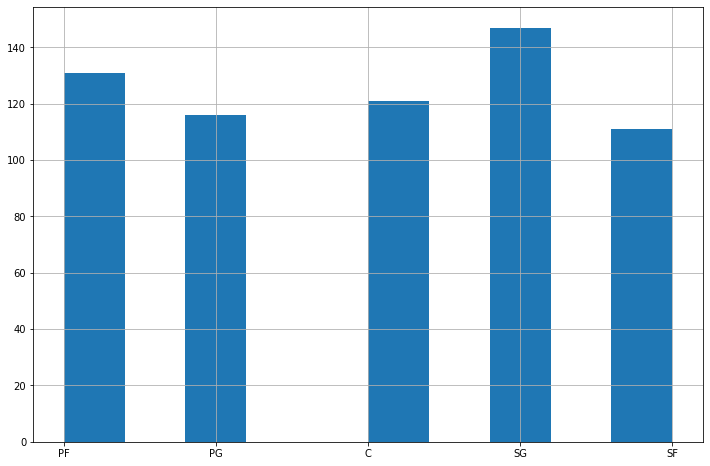

In [102]:
Adv_Stats_1['Pos'].hist(bins=10, figsize=(12, 8))

array([[<AxesSubplot:title={'center':'MP'}>,
        <AxesSubplot:title={'center':'3PAr'}>,
        <AxesSubplot:title={'center':'BPM'}>,
        <AxesSubplot:title={'center':'OBPM'}>],
       [<AxesSubplot:title={'center':'DBPM'}>,
        <AxesSubplot:title={'center':'G'}>,
        <AxesSubplot:title={'center':'VORP'}>,
        <AxesSubplot:title={'center':'WS'}>],
       [<AxesSubplot:title={'center':'WS/48'}>,
        <AxesSubplot:title={'center':'OWS'}>,
        <AxesSubplot:title={'center':'DWS'}>,
        <AxesSubplot:title={'center':'PER'}>],
       [<AxesSubplot:title={'center':'USG%'}>,
        <AxesSubplot:title={'center':'TS%'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

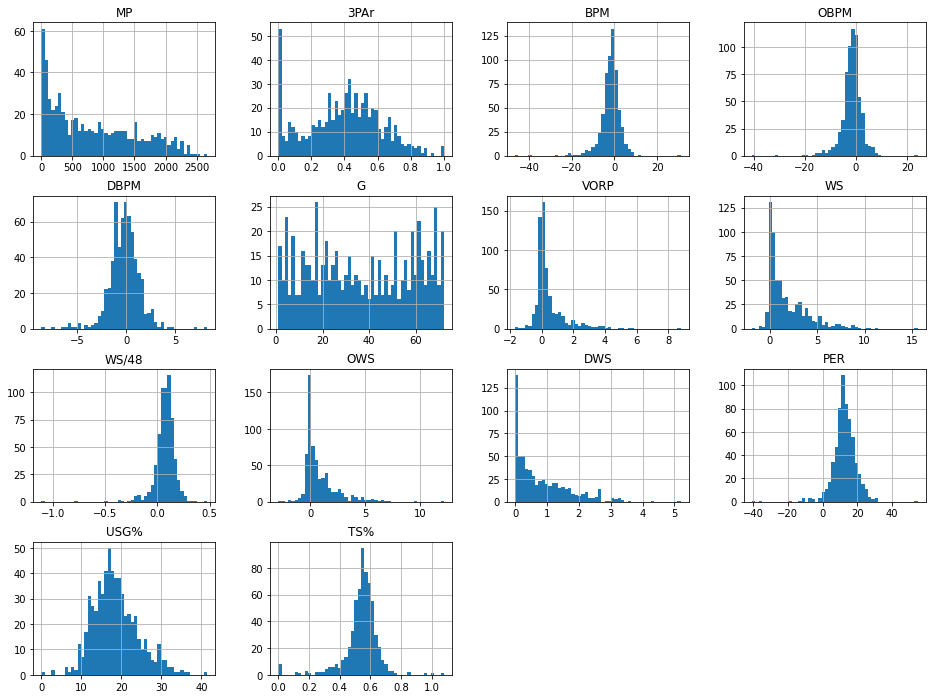

In [103]:
Adv_Stats_1[['MP', '3PAr', 'BPM', 'OBPM', 'DBPM', 'G', 'VORP', 'WS', 'WS/48', 'OWS', 'DWS', 'PER', 'USG%', 'TS%']].hist(bins=50, figsize=(16,12))

<AxesSubplot:>

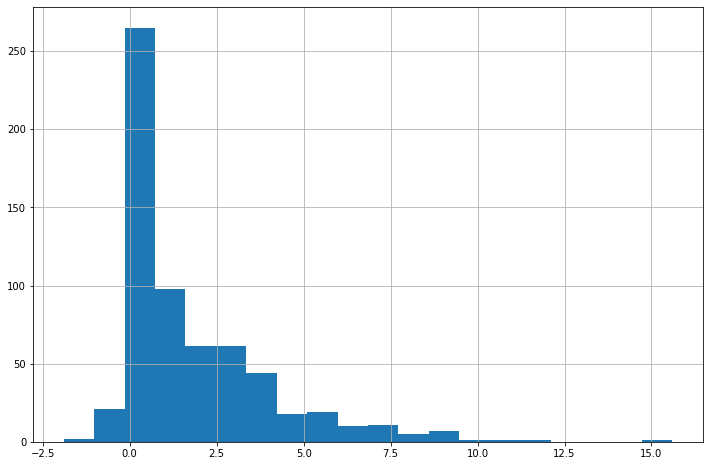

In [104]:
Adv_Stats_1['WS'].hist(bins=20, figsize=(12,8))

In [105]:
#interesting stats, max/mean/min of WS/OWS/DWS/OBPM/DBPM/BPM/VORP

array([[<AxesSubplot:title={'center':'WS'}>,
        <AxesSubplot:title={'center':'WS/48'}>],
       [<AxesSubplot:title={'center':'OWS'}>,
        <AxesSubplot:title={'center':'DWS'}>]], dtype=object)

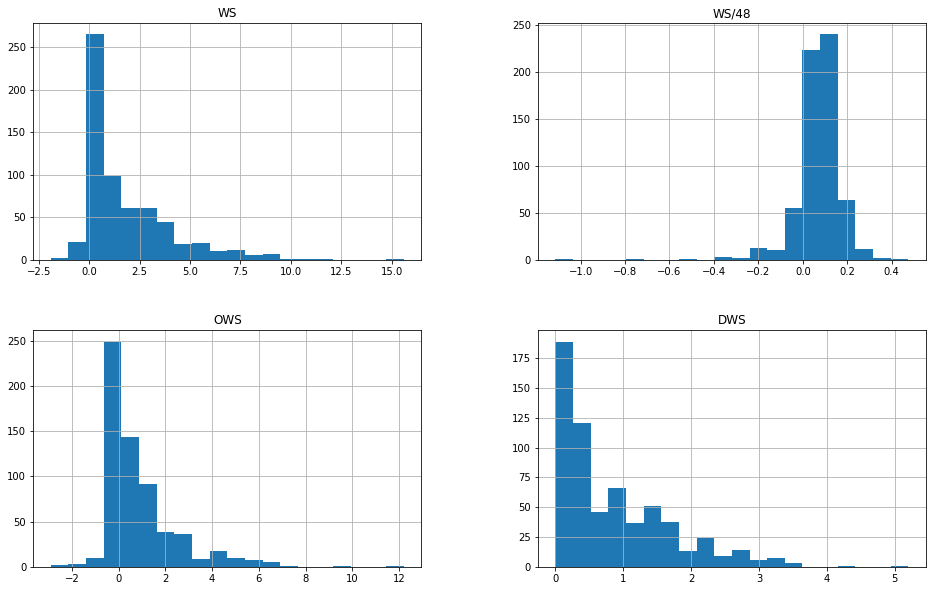

In [106]:
Adv_Stats_1[['WS', 'WS/48', 'OWS', 'DWS']].hist(bins=20, figsize=(16,10))

In [107]:
a = Adv_Stats_1['WS'].mean()
b = Adv_Stats_1['WS/48'].mean()
c = Adv_Stats_1['OWS'].mean()
d = Adv_Stats_1['DWS'].mean()
[a, b, c, d]

[1.7571884984025559,
 0.07039936102236422,
 0.9097444089456869,
 0.8455271565495207]

In [108]:
a = Adv_Stats_1['WS'].min()
b = Adv_Stats_1['WS/48'].min()
c = Adv_Stats_1['OWS'].min()
d = Adv_Stats_1['DWS'].min()
[a, b, c, d]

[-1.9, -1.113, -2.9, 0.0]

In [109]:
a = Adv_Stats_1['WS'].max()
b = Adv_Stats_1['WS/48'].max()
c = Adv_Stats_1['OWS'].max()
d = Adv_Stats_1['DWS'].max()
[a, b, c, d]

[15.6, 0.475, 12.2, 5.2]

In [110]:
players_by_most_win_share = Adv_Stats_1.sort_values(by='WS', ascending=False)[['Player', 'WS', 'WS/48', 'OWS', 'DWS']]
players_by_most_win_share.set_index('Player', inplace=True)
players_by_most_win_share

,WS,WS/48,OWS,DWS
Player,,,,
Nikola Jokić,15.6,0.301,12.2,3.4
Rudy Gobert,11.3,0.248,6.1,5.2
Damian Lillard,10.4,0.209,9.6,0.8
Giannis Antetokounmpo,10.2,0.244,6.9,3.3
Jimmy Butler,9.3,0.255,6.6,2.7
...,...,...,...,...
Théo Maledon,-0.8,-0.021,-1.9,1.1
Josh Hall,-0.9,-0.126,-1.1,0.2
Darius Bazley,-0.9,-0.026,-2.3,1.4


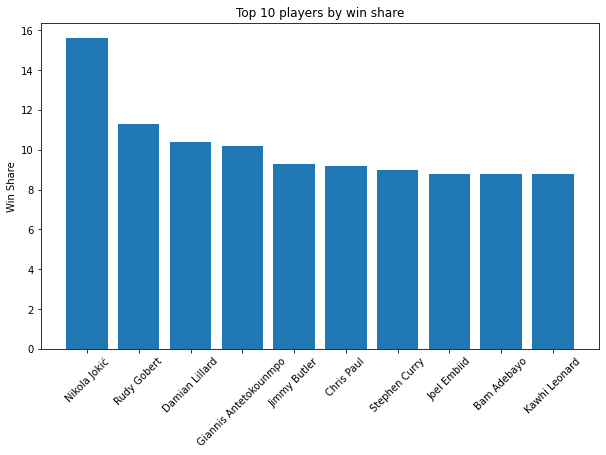

In [111]:
x = players_by_most_win_share[:10].index
y = players_by_most_win_share[:10]['WS']
plt.figure(figsize=(10,6))
plt.title('Top 10 players by win share')
plt.bar(x, y)
plt.ylabel('Win Share')
plt.xticks(rotation=45)
plt.show()

In [112]:
a = players_by_most_win_share['WS']['Stephen Curry']
b = players_by_most_win_share['WS']['LeBron James']
c = players_by_most_win_share['WS']['Giannis Antetokounmpo']
d = players_by_most_win_share['WS']['John Wall']
[a, b, c, d]

[9.0, 5.6, 10.2, -0.2]

In [113]:
players_by_most_win_share['WS'].mean()

1.7571884984025559

In [114]:
players_by_most_win_share = Adv_Stats_1.sort_values(by='WS')[['Player', 'WS', 'WS/48', 'OWS', 'DWS']]
players_by_most_win_share.set_index('Player', inplace=True)
players_by_most_win_share

,WS,WS/48,OWS,DWS
Player,,,,
Aleksej Pokusevski,-1.9,-0.084,-2.9,1.0
Killian Hayes,-1.1,-0.081,-1.8,0.6
Josh Hall,-0.9,-0.126,-1.1,0.2
Darius Bazley,-0.9,-0.026,-2.3,1.4
Théo Maledon,-0.8,-0.021,-1.9,1.1
...,...,...,...,...
Jimmy Butler,9.3,0.255,6.6,2.7
Giannis Antetokounmpo,10.2,0.244,6.9,3.3
Damian Lillard,10.4,0.209,9.6,0.8


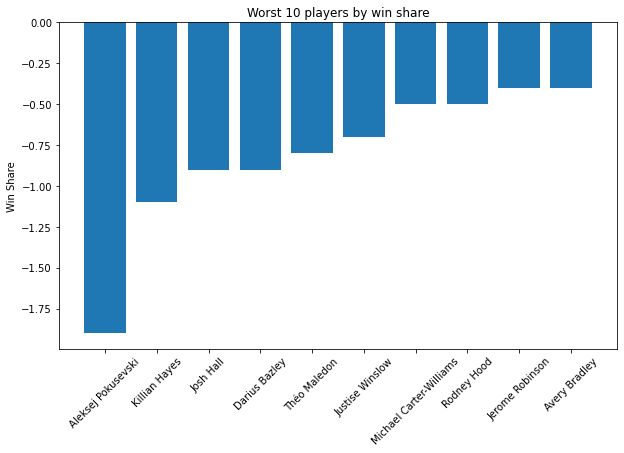

In [115]:
x = players_by_most_win_share[:10].index
y = players_by_most_win_share[:10]['WS']
plt.figure(figsize=(10,6))
plt.title('Worst 10 players by win share')
plt.bar(x, y)
plt.ylabel('Win Share')
plt.xticks(rotation=45)
plt.show()

In [116]:
Adv_players_groupby = Adv_Stats_1.groupby('Player')

In [117]:
Adv_players_groupby_sum = Adv_players_groupby.sum()

In [118]:
a = Adv_players_groupby_sum['WS'].loc['LeBron James']
b = Adv_players_groupby_sum['WS'].loc['Stephen Curry']
c = Adv_players_groupby_sum['WS'].loc['Nikola Jokić']
[a, b, c]

[5.6, 9.0, 15.6]

<AxesSubplot:>

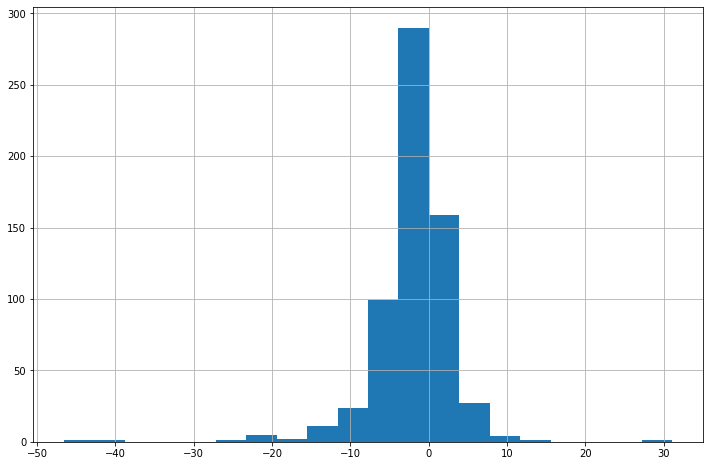

In [119]:
Adv_Stats_1['BPM'].hist(bins=20, figsize=(12, 8))

array([[<AxesSubplot:title={'center':'BPM'}>,
        <AxesSubplot:title={'center':'OBPM'}>],
       [<AxesSubplot:title={'center':'DBPM'}>,
        <AxesSubplot:title={'center':'VORP'}>]], dtype=object)

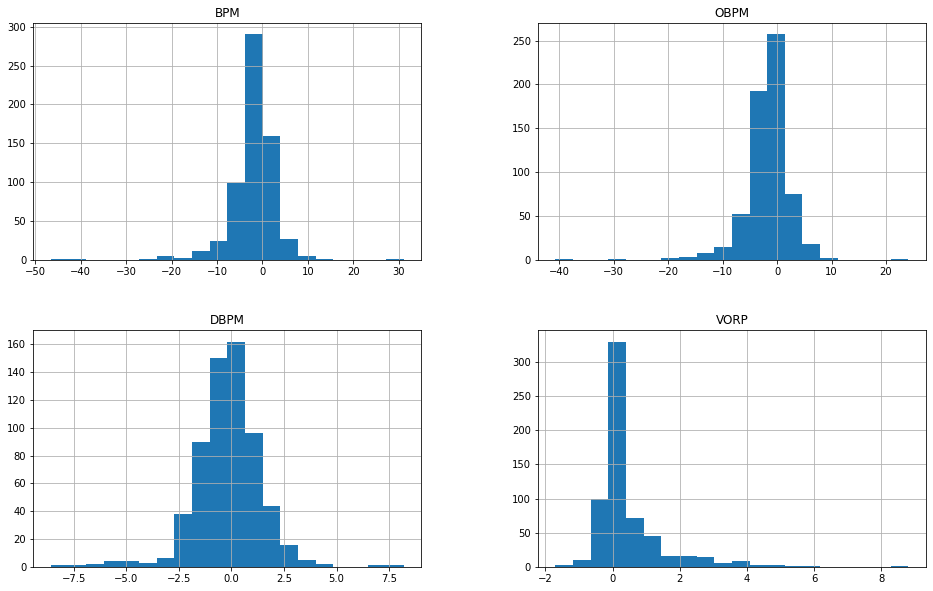

In [120]:
Adv_Stats_1[['BPM', 'OBPM', 'DBPM', 'VORP']].hist(bins=20, figsize=(16,10))

In [121]:
a = Adv_Stats_1['BPM'].mean()
b = Adv_Stats_1['VORP'].mean()
c = Adv_Stats_1['OBPM'].mean()
d = Adv_Stats_1['DBPM'].mean()
[a, b, c, d]

[-1.8966453674121404,
 0.42076677316293926,
 -1.7153354632587858,
 -0.1800319488817891]

In [122]:
a = Adv_Stats_1['BPM'].min()
b = Adv_Stats_1['VORP'].min()
c = Adv_Stats_1['OBPM'].min()
d = Adv_Stats_1['DBPM'].min()
[a, b, c, d]

[-46.6, -1.7, -40.7, -8.6]

In [123]:
a = Adv_Stats_1['BPM'].max()
b = Adv_Stats_1['VORP'].max()
c = Adv_Stats_1['OBPM'].max()
d = Adv_Stats_1['DBPM'].max()
[a, b, c, d]

[31.1, 8.8, 24.1, 8.2]

In [124]:
players_by_most_BPM = Adv_Stats_1.sort_values(by='BPM', ascending=False)[['Player', 'BPM', 'OBPM', 'DBPM', 'VORP']]
players_by_most_BPM.set_index('Player', inplace=True)
players_by_most_BPM

,BPM,OBPM,DBPM,VORP
Player,,,,
Udonis Haslem,31.1,24.1,7.0,0.0
Nikola Jokić,12.1,9.1,3.0,8.8
Gary Payton II,9.2,1.0,8.2,0.1
Giannis Antetokounmpo,9.0,6.2,2.8,5.6
Stephen Curry,8.7,8.3,0.4,5.8
...,...,...,...,...
Ignas Brazdeikis,-21.4,-15.2,-6.2,0.0
Jared Harper,-22.1,-16.6,-5.5,-0.1
Noah Vonleh,-26.7,-20.9,-5.8,-0.1


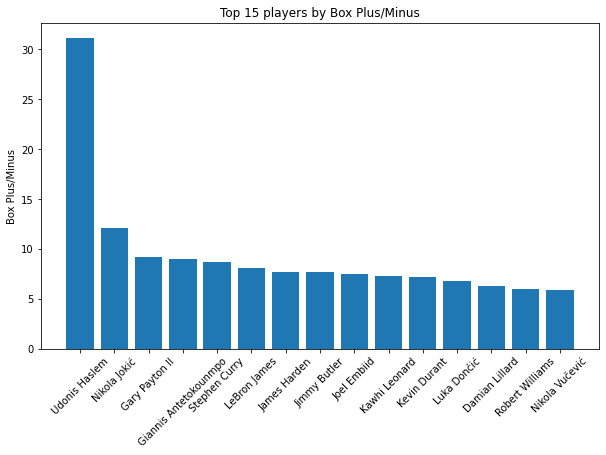

In [125]:
x = players_by_most_BPM[:15].index
y = players_by_most_BPM[:15]['BPM']
plt.figure(figsize=(10,6))
plt.title('Top 15 players by Box Plus/Minus')
plt.bar(x, y)
plt.ylabel('Box Plus/Minus')
plt.xticks(rotation=45)
plt.show()

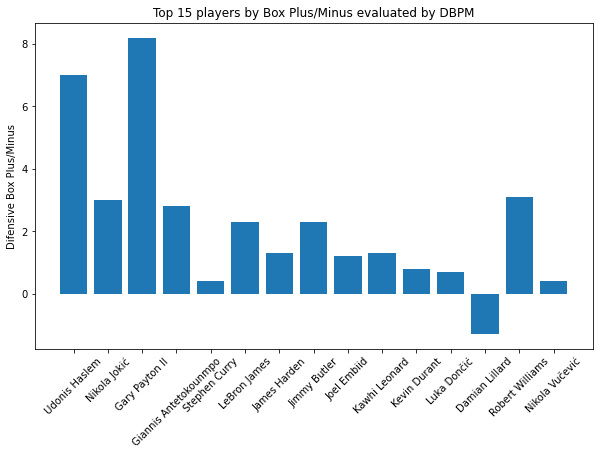

In [126]:
x = players_by_most_BPM[:15].index
y = players_by_most_BPM[:15]['DBPM']
plt.figure(figsize=(10,6))
plt.title('Top 15 players by Box Plus/Minus evaluated by DBPM')
plt.bar(x, y)
plt.ylabel('Difensive Box Plus/Minus')
plt.xticks(rotation=45)
plt.show()

In [127]:
a = players_by_most_BPM['BPM']['Stephen Curry']
b = players_by_most_BPM['BPM']['LeBron James']
c = players_by_most_BPM['BPM']['Lonzo Ball']
d = players_by_most_BPM['BPM']['Seth Curry']
e = players_by_most_BPM['BPM']['DeMar DeRozan']
[a, b, c, d, e]

[8.7, 8.1, 1.7, -0.3, 3.1]

In [128]:
players_by_most_BPM['BPM']['James Harden']

Player
James Harden    7.7
James Harden    5.0
Name: BPM, dtype: float64

In [129]:
players_by_most_VORP = Adv_Stats_1.sort_values(by='VORP', ascending=False)[['Player', 'VORP', 'BPM', 'OBPM', 'DBPM']]
players_by_most_VORP.set_index('Player', inplace=True)
players_by_most_VORP

,VORP,BPM,OBPM,DBPM
Player,,,,
Nikola Jokić,8.8,12.1,9.1,3.0
Stephen Curry,5.8,8.7,8.3,0.4
Giannis Antetokounmpo,5.6,9.0,6.2,2.8
Luka Dončić,5.1,6.8,6.1,0.7
Damian Lillard,5.0,6.3,7.5,-1.3
...,...,...,...,...
Darius Bazley,-1.0,-4.4,-3.1,-1.3
Aleksej Pokusevski,-1.1,-6.1,-5.1,-1.0
Théo Maledon,-1.3,-5.0,-4.0,-1.0


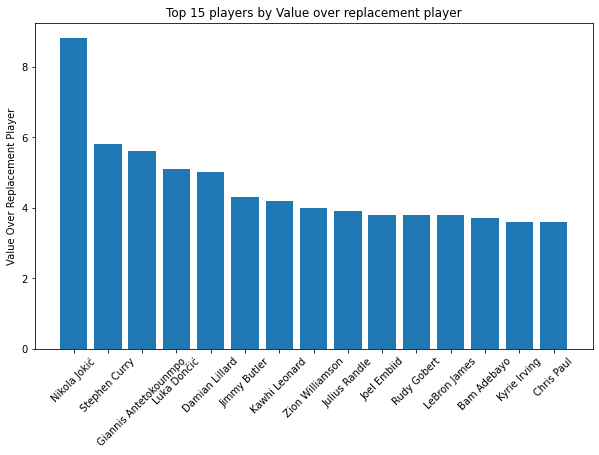

In [130]:
x = players_by_most_VORP[:15].index
y = players_by_most_VORP[:15]['VORP']
plt.figure(figsize=(10,6))
plt.title('Top 15 players by Value over replacement player')
plt.bar(x, y)
plt.ylabel('Value Over Replacement Player')
plt.xticks(rotation=45)
plt.show()

In [131]:
BPM_with_mask = Adv_Stats_1.sort_values(by='WS', ascending=False)[['Player', 'BPM', 'OBPM', 'DBPM', 'VORP', 'G']]
BPM_with_mask.set_index('Player', inplace=True)
games_mask_30 = BPM_with_mask['G'] > 30

In [132]:
BPM_with_mask[games_mask_30]

,BPM,OBPM,DBPM,VORP,G
Player,,,,,
Nikola Jokić,12.1,9.1,3.0,8.8,72.0
Rudy Gobert,4.9,2.1,2.8,3.8,71.0
Damian Lillard,6.3,7.5,-1.3,5.0,67.0
Giannis Antetokounmpo,9.0,6.2,2.8,5.6,61.0
Jimmy Butler,7.7,5.4,2.3,4.3,52.0
...,...,...,...,...,...
Rodney Hood,-6.8,-5.3,-1.5,-0.9,38.0
Michael Carter-Williams,-4.8,-4.6,-0.2,-0.6,31.0
Théo Maledon,-5.0,-4.0,-1.0,-1.3,65.0


## Per Game Stats

In [133]:
data = pd.read_html("https://www.basketball-reference.com/leagues/NBA_2021_per_game.html")
df_xGStats = pd.DataFrame(data[0])
xG_Stats = df_xGStats.where(df_xGStats["Player"] != "Player").dropna(how='all', axis=0)

In [134]:
df_xGStats.to_csv('df_xGStats.csv', index=False)

In [135]:
xG_Stats_1 = xG_Stats.where(xG_Stats["Tm"] != "TOT").dropna(how='all', axis=0)
xG_Stats_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 626 entries, 0 to 730
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Rk      626 non-null    object
 1   Player  626 non-null    object
 2   Pos     626 non-null    object
 3   Age     626 non-null    object
 4   Tm      626 non-null    object
 5   G       626 non-null    object
 6   GS      626 non-null    object
 7   MP      626 non-null    object
 8   FG      626 non-null    object
 9   FGA     626 non-null    object
 10  FG%     624 non-null    object
 11  3P      626 non-null    object
 12  3PA     626 non-null    object
 13  3P%     593 non-null    object
 14  2P      626 non-null    object
 15  2PA     626 non-null    object
 16  2P%     620 non-null    object
 17  eFG%    624 non-null    object
 18  FT      626 non-null    object
 19  FTA     626 non-null    object
 20  FT%     598 non-null    object
 21  ORB     626 non-null    object
 22  DRB     626 non-null    ob

In [136]:
xG_Stats_1.drop('Rk', axis=1, inplace=True)

In [137]:
for el in xG_Stats_1:
  if(el != "Player" and el != "Pos"  and el != "Tm"):
    xG_Stats_1[el] = pd.to_numeric(xG_Stats_1[el])

In [138]:
xG_Stats_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 626 entries, 0 to 730
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  626 non-null    object 
 1   Pos     626 non-null    object 
 2   Age     626 non-null    int64  
 3   Tm      626 non-null    object 
 4   G       626 non-null    int64  
 5   GS      626 non-null    int64  
 6   MP      626 non-null    float64
 7   FG      626 non-null    float64
 8   FGA     626 non-null    float64
 9   FG%     624 non-null    float64
 10  3P      626 non-null    float64
 11  3PA     626 non-null    float64
 12  3P%     593 non-null    float64
 13  2P      626 non-null    float64
 14  2PA     626 non-null    float64
 15  2P%     620 non-null    float64
 16  eFG%    624 non-null    float64
 17  FT      626 non-null    float64
 18  FTA     626 non-null    float64
 19  FT%     598 non-null    float64
 20  ORB     626 non-null    float64
 21  DRB     626 non-null    float64
 22  TR

In [139]:
xG_Stats_1.describe()

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,624.000000,626.000000,626.000000,593.000000,...,598.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000
mean,25.728435,36.827476,17.252396,19.526837,3.201118,7.007668,0.443099,0.974601,2.746006,0.313315,...,0.751062,0.807827,2.783387,3.590256,1.949361,0.612460,0.415974,1.080511,1.627157,8.715974
std,4.096405,21.790911,22.015199,9.367063,2.327811,4.809408,0.115565,0.895416,2.268940,0.129626,...,0.151528,0.737207,1.835580,2.404792,1.846313,0.400286,0.417268,0.833482,0.776349,6.411899
min,19.000000,1.000000,0.000000,1.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,18.000000,0.000000,12.100000,1.400000,3.400000,0.397750,0.200000,0.900000,0.269000,...,0.682000,0.300000,1.500000,1.900000,0.700000,0.300000,0.100000,0.500000,1.100000,4.000000
50%,25.000000,36.000000,5.000000,19.500000,2.700000,5.900000,0.440500,0.750000,2.300000,0.340000,...,0.776000,0.600000,2.500000,3.200000,1.400000,0.600000,0.300000,0.900000,1.600000,7.200000
75%,28.000000,57.750000,30.000000,27.300000,4.400000,9.400000,0.497250,1.500000,4.275000,0.389000,...,0.845750,1.000000,3.775000,4.800000,2.500000,0.900000,0.600000,1.400000,2.100000,11.975000
max,40.000000,72.000000,72.000000,37.600000,11.200000,23.000000,1.000000,5.300000,12.700000,1.000000,...,1.000000,4.700000,10.100000,14.300000,11.700000,2.100000,3.400000,5.000000,4.000000,32.000000


In [140]:
#fillna con le percentuali = 0 quindi aggiungere 0 dove manca
xG_Stats_1['FG%'].fillna(0, inplace=True)
xG_Stats_1['3P%'].fillna(0, inplace=True)
xG_Stats_1['2P%'].fillna(0, inplace=True)
xG_Stats_1['eFG%'].fillna(0, inplace=True)
xG_Stats_1['FT%'].fillna(0, inplace=True)
xG_Stats_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 626 entries, 0 to 730
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  626 non-null    object 
 1   Pos     626 non-null    object 
 2   Age     626 non-null    int64  
 3   Tm      626 non-null    object 
 4   G       626 non-null    int64  
 5   GS      626 non-null    int64  
 6   MP      626 non-null    float64
 7   FG      626 non-null    float64
 8   FGA     626 non-null    float64
 9   FG%     626 non-null    float64
 10  3P      626 non-null    float64
 11  3PA     626 non-null    float64
 12  3P%     626 non-null    float64
 13  2P      626 non-null    float64
 14  2PA     626 non-null    float64
 15  2P%     626 non-null    float64
 16  eFG%    626 non-null    float64
 17  FT      626 non-null    float64
 18  FTA     626 non-null    float64
 19  FT%     626 non-null    float64
 20  ORB     626 non-null    float64
 21  DRB     626 non-null    float64
 22  TR

In [141]:
#rimuovere qualche variabile sulla quale non fare nessuna task, ad esempio PF, eFG% ecc.

In [142]:
#replace some special letters with letters in the keyboard

In [143]:
xG_Stats_1.to_csv('xG_Stats_1.csv', index=False)

In [144]:
#fare plot con una variabile e tutti i giocatori per vedere le varie similutidini ecc

### Histograms

<AxesSubplot:>

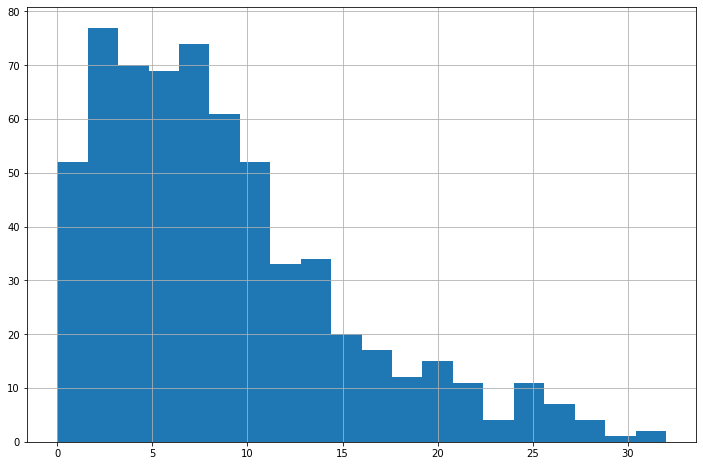

In [145]:
xG_Stats_1['PTS'].hist(bins=20, figsize=(12, 8))

array([[<AxesSubplot:title={'center':'PTS'}>,
        <AxesSubplot:title={'center':'AST'}>],
       [<AxesSubplot:title={'center':'TRB'}>,
        <AxesSubplot:title={'center':'MP'}>],
       [<AxesSubplot:title={'center':'BLK'}>,
        <AxesSubplot:title={'center':'STL'}>]], dtype=object)

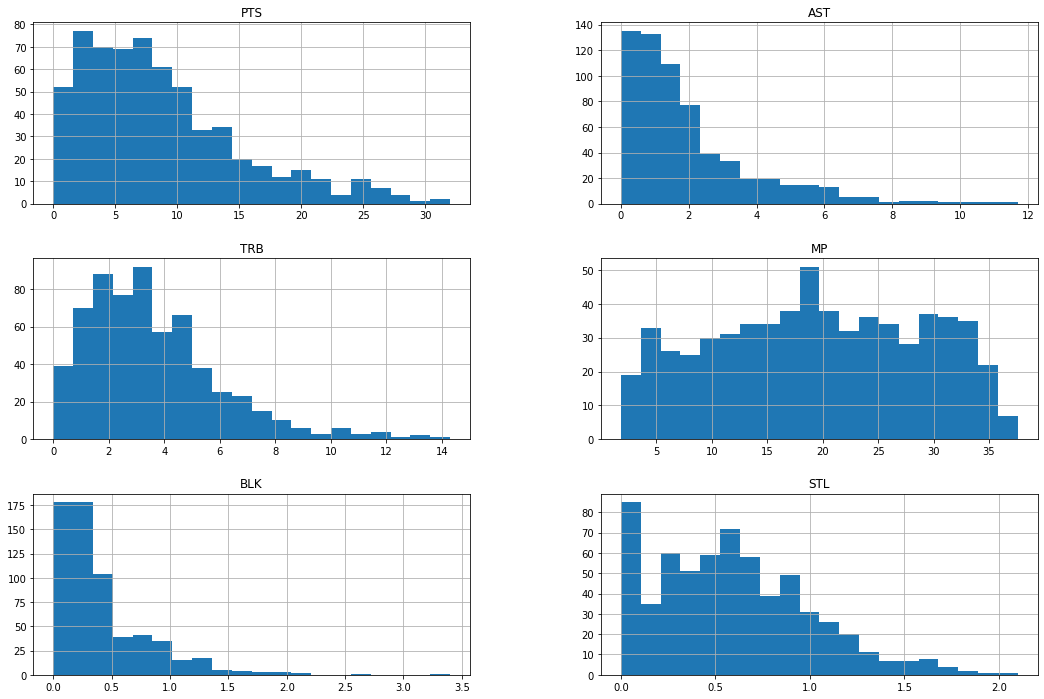

In [146]:
xG_Stats_1[['PTS', 'AST', 'TRB', 'MP', 'BLK', 'STL']].hist(bins=20, figsize=(18,12))

In [147]:
#giocatore con media punti/assist/rimbalzi/stoppate ecc più alta
a = xG_Stats_1['PTS'].max()
b = xG_Stats_1['AST'].max()
c = xG_Stats_1['TRB'].max()
d = xG_Stats_1['STL'].max()
e = xG_Stats_1['TOV'].max()
f = xG_Stats_1['BLK'].max()
[a,b,c,d,e,f]

[32.0, 11.7, 14.3, 2.1, 5.0, 3.4]

In [148]:
a = xG_Stats_1['PTS'].mean()
b = xG_Stats_1['AST'].mean()
c = xG_Stats_1['TRB'].mean()
d = xG_Stats_1['STL'].mean()
e = xG_Stats_1['TOV'].mean()
f = xG_Stats_1['BLK'].mean()
[a,b,c,d,e,f]

[8.71597444089457,
 1.9493610223642175,
 3.590255591054313,
 0.6124600638977635,
 1.0805111821086264,
 0.41597444089456864]

In [149]:
a = xG_Stats_1['PTS'].min()
b = xG_Stats_1['AST'].min()
c = xG_Stats_1['TRB'].min()
d = xG_Stats_1['STL'].min()
e = xG_Stats_1['TOV'].min()
f = xG_Stats_1['BLK'].min()
[a,b,c,d,e,f]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [150]:
#liste per variabili varie
PTS = list(xG_Stats_1['PTS'])

In [151]:
#xG_Stats_1[xG_Stats_1['PTS'].max()]

### Ex con tabelline e group by ecc

In [152]:
players_by_most_games = xG_Stats_1.sort_values(by='GS', ascending=False)[['Player', 'G', 'GS', 'PTS']]
players_by_most_games.set_index('Player', inplace=True)
players_by_most_games

,G,GS,PTS
Player,,,
RJ Barrett,72,72,17.6
Nikola Jokić,72,72,26.4
Mikal Bridges,72,72,13.5
Duncan Robinson,72,72,13.1
Bojan Bogdanović,72,72,17.0
...,...,...,...
Luke Kornet,13,0,2.0
John Konchar,43,0,4.3
Andre Roberson,5,0,1.2


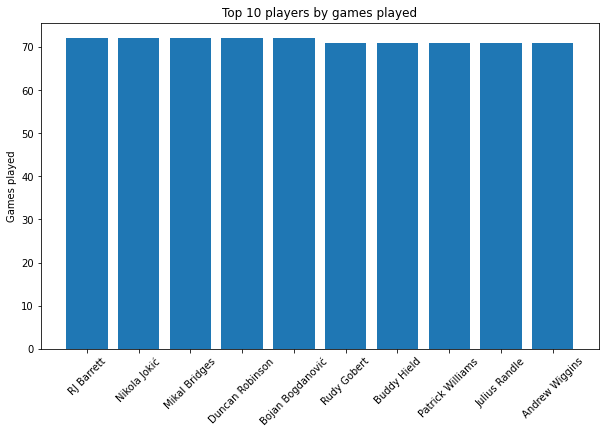

In [153]:
x = players_by_most_games[:10].index
y = players_by_most_games[:10]['GS']
plt.figure(figsize=(10,6))
plt.title('Top 10 players by games played')
plt.bar(x, y)
plt.ylabel('Games played')
plt.xticks(rotation=45)
plt.show()

In [154]:
players_by_most_games['GS']['Mikal Bridges']

72

In [155]:
players_by_most_points = xG_Stats_1.sort_values(by='PTS', ascending=False)[['Player', 'PTS', 'AST', 'TRB']]
players_by_most_points.set_index('Player', inplace=True)
players_by_most_points

,PTS,AST,TRB
Player,,,
Stephen Curry,32.0,5.8,5.5
Bradley Beal,31.3,4.4,4.7
Damian Lillard,28.8,7.5,4.2
Joel Embiid,28.5,2.8,10.6
Giannis Antetokounmpo,28.1,5.9,11.0
...,...,...,...
Anžejs Pasečņiks,0.0,1.0,1.0
Gary Clark,0.0,0.0,0.5
Noah Vonleh,0.0,0.3,0.3


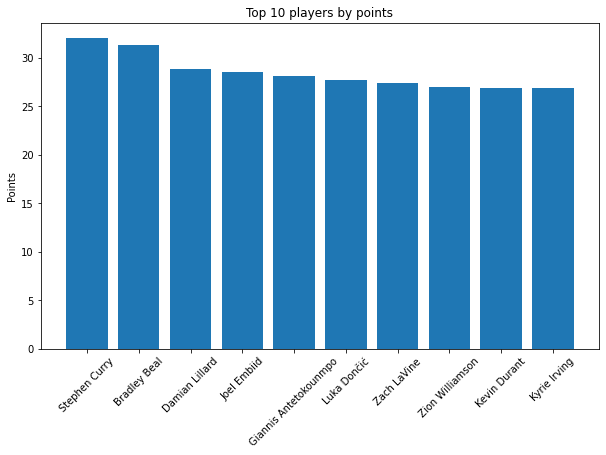

In [156]:
x = players_by_most_points[:10].index
y = players_by_most_points[:10]['PTS']
plt.figure(figsize=(10,6))
plt.title('Top 10 players by points')
plt.bar(x, y)
plt.ylabel('Points')
plt.xticks(rotation=45)
plt.show()

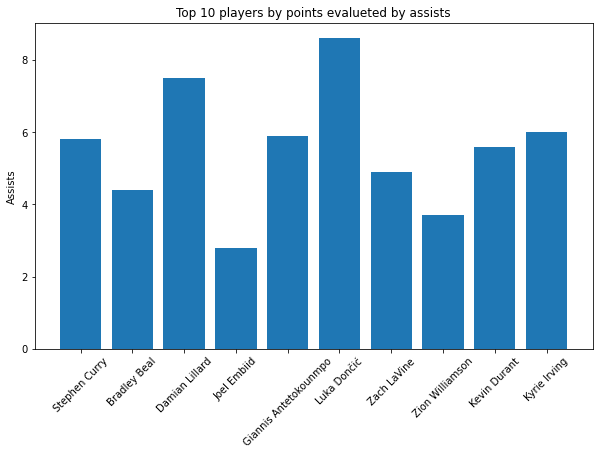

In [157]:
x = players_by_most_points[:10].index
y = players_by_most_points[:10]['AST']
plt.figure(figsize=(10,6))
plt.title('Top 10 players by points evalueted by assists')
plt.bar(x, y)
plt.ylabel('Assists')
plt.xticks(rotation=45)
plt.show()

In [158]:
a = players_by_most_points['PTS']['Stephen Curry']
b = players_by_most_points['PTS']['LeBron James']
c = players_by_most_points['PTS']['Nikola Jokić']
d = players_by_most_points['PTS']['Giannis Antetokounmpo']
e = players_by_most_points['PTS']['John Wall']
[a, b, c, d, e]

[32.0, 25.0, 26.4, 28.1, 20.6]

In [159]:
xG_players_groupby = xG_Stats_1.groupby('Player')

In [160]:
xG_players_groupby_sum = xG_players_groupby.sum()

In [161]:
a = xG_players_groupby_sum['PTS'].loc['LeBron James']
b = xG_players_groupby_sum['PTS'].loc['Stephen Curry']
[a, b]

[25.0, 32.0]

In [162]:
a = xG_players_groupby_sum['AST'].loc['LeBron James']
b = xG_players_groupby_sum['AST'].loc['Stephen Curry']
[a, b]

[7.8, 5.8]

### Analysis with Accuracy and FGA

In [163]:
players_by_most_FGA = xG_Stats_1.sort_values(by='FGA', ascending=False)[['Player', 'FG', 'FGA', '3P', '3PA', '2P', '2PA', 'FT', 'FTA']]
players_by_most_FGA.set_index('Player', inplace=True)
players_by_most_FGA['ACCURACY'] = players_by_most_FGA['FG'] / players_by_most_FGA['FGA']

In [164]:
most_accurate_mask = players_by_most_FGA['ACCURACY'] == players_by_most_FGA['ACCURACY'].max()
at_least_15_shots_xG = players_by_most_FGA['FGA'] >= 15

In [165]:
players_by_most_FGA[most_accurate_mask & at_least_15_shots_xG]

,FG,FGA,3P,3PA,2P,2PA,FT,FTA,ACCURACY
Player,,,,,,,,,


In [166]:
players_by_most_FGA[players_by_most_FGA['ACCURACY'] == players_by_most_FGA['ACCURACY'].max()]

,FG,FGA,3P,3PA,2P,2PA,FT,FTA,ACCURACY
Player,,,,,,,,,
Udonis Haslem,2.0,2.0,0.0,0.0,2.0,2.0,0.0,0.0,1.0
Patrick McCaw,0.2,0.2,0.0,0.0,0.2,0.2,0.6,0.6,1.0


In [167]:
players_by_most_FGA[at_least_15_shots_xG]

,FG,FGA,3P,3PA,2P,2PA,FT,FTA,ACCURACY
Player,,,,,,,,,
Bradley Beal,11.2,23.0,2.2,6.2,9.0,16.8,6.8,7.7,0.486957
Stephen Curry,10.4,21.7,5.3,12.7,5.1,9.0,5.7,6.3,0.479263
Jayson Tatum,9.5,20.6,2.9,7.6,6.5,13.0,4.6,5.3,0.461165
Nikola Vučević,9.9,20.6,2.7,6.5,7.3,14.1,2.1,2.5,0.480583
Donovan Mitchell,9.0,20.6,3.4,8.7,5.7,11.9,5.0,6.0,0.436893
Luka Dončić,9.8,20.5,2.9,8.3,6.9,12.2,5.2,7.1,0.478049
Kyrie Irving,10.2,20.1,2.8,7.0,7.4,13.1,3.7,4.0,0.507463
Damian Lillard,9.0,19.9,4.1,10.5,4.9,9.4,6.7,7.2,0.452261
Zach LaVine,9.8,19.4,3.4,8.2,6.4,11.1,4.4,5.1,0.505155


In [168]:
players_by_most_FGA[players_by_most_FGA['ACCURACY'] == players_by_most_FGA[at_least_15_shots_xG]['ACCURACY'].max()]

,FG,FGA,3P,3PA,2P,2PA,FT,FTA,ACCURACY
Player,,,,,,,,,
Zion Williamson,10.4,17.0,0.2,0.6,10.2,16.4,6.0,8.7,0.611765


### Team and stats features 

In [169]:
team_player_groupby = xG_Stats_1.groupby(['Tm', 'Player'])

In [170]:
team_player_groupby_mean_stats = team_player_groupby[['PTS', 'AST', 'TRB', 'BLK']].mean()

In [171]:
team_df = pd.DataFrame(team_player_groupby_mean_stats)

In [172]:
team_df

PTS   AST   TRB  BLK
Tm  Player                                  
ATL Bogdan Bogdanović  16.4   3.3   3.6  0.3
    Brandon Goodwin     4.9   2.0   1.5  0.0
    Bruno Fernando      1.5   0.3   2.4  0.1
    Cam Reddish        11.2   1.3   4.0  0.3
    Clint Capela       15.2   0.8  14.3  2.0
...                     ...   ...   ...  ...
WAS Robin Lopez         9.0   0.8   3.8  0.6
    Rui Hachimura      13.8   1.4   5.5  0.1
    Russell Westbrook  22.2  11.7  11.5  0.4
    Thomas Bryant      14.3   1.5   6.1  0.8
    Troy Brown Jr.      4.3   0.9   2.9  0.2

[626 rows x 4 columns]

In [173]:
team_df.loc[('ATL'),:]

,PTS,AST,TRB,BLK
Player,,,,
Bogdan Bogdanović,16.4,3.3,3.6,0.3
Brandon Goodwin,4.9,2.0,1.5,0.0
Bruno Fernando,1.5,0.3,2.4,0.1
Cam Reddish,11.2,1.3,4.0,0.3
Clint Capela,15.2,0.8,14.3,2.0
Danilo Gallinari,13.3,1.5,4.1,0.2
De'Andre Hunter,15.0,1.9,4.8,0.5
John Collins,17.6,1.2,7.4,1.0
Kevin Huerter,11.9,3.5,3.3,0.3


## Predictive model

### Per Game

In [174]:
xG_Stats_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 626 entries, 0 to 730
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  626 non-null    object 
 1   Pos     626 non-null    object 
 2   Age     626 non-null    int64  
 3   Tm      626 non-null    object 
 4   G       626 non-null    int64  
 5   GS      626 non-null    int64  
 6   MP      626 non-null    float64
 7   FG      626 non-null    float64
 8   FGA     626 non-null    float64
 9   FG%     626 non-null    float64
 10  3P      626 non-null    float64
 11  3PA     626 non-null    float64
 12  3P%     626 non-null    float64
 13  2P      626 non-null    float64
 14  2PA     626 non-null    float64
 15  2P%     626 non-null    float64
 16  eFG%    626 non-null    float64
 17  FT      626 non-null    float64
 18  FTA     626 non-null    float64
 19  FT%     626 non-null    float64
 20  ORB     626 non-null    float64
 21  DRB     626 non-null    float64
 22  TR

### Cluster

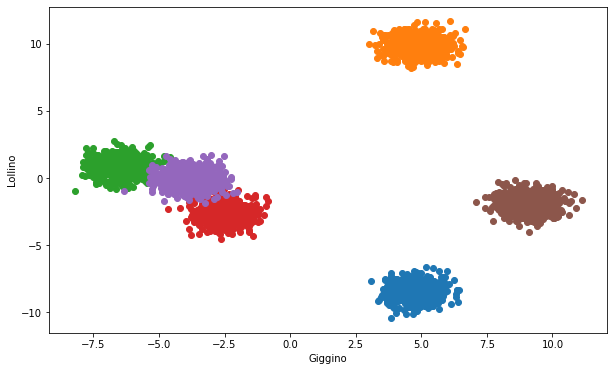

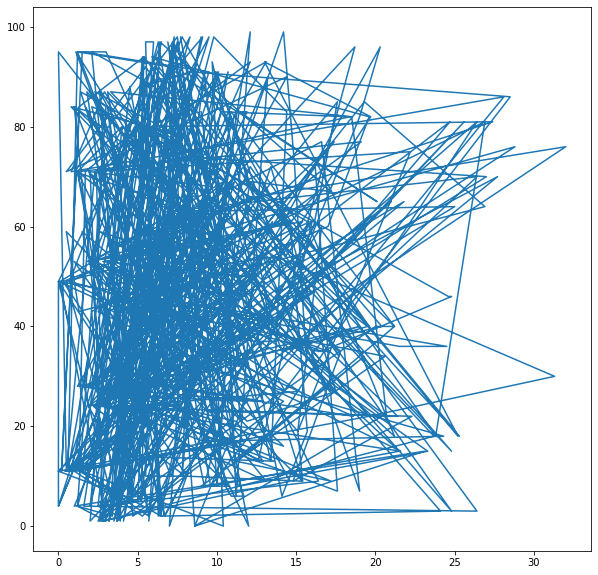

In [175]:
cl_data = xG_Stats_1[['Player', 'PTS', 'Age', 'AST', 'TRB', 'MP']]
x, y = make_blobs(n_samples=cl_data.count(), n_features=2, cluster_std=0.6)
plt.figure(figsize=(10,6))
for i in range(10):
    plt.scatter(x[y == i,0], x[y == i,1])
    plt.xlabel('Giggino')
    plt.ylabel('Lollino')

km = KMeans(n_clusters=10, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(x)

cl_data.sort_values(by='Player')
plt.figure(figsize=(10, 10))

y_pred = KMeans(n_clusters=100).fit_predict(X=cl_data.drop(columns=['Player']))
plt.plot(cl_data['PTS'], y_pred)
plt.show()

### Random Forest

In [176]:
xG_datad = xG_Stats_1[['Player', 'PTS', 'AST', 'TRB', 'MP', 'BLK', 'STL', 'TOV', 'FGA', 'Age', 'Pos']]
xG_datad.sort_values(by='Player')

,Player,PTS,AST,TRB,MP,BLK,STL,TOV,FGA,Age,Pos
241,Aaron Gordon,14.6,4.2,6.6,29.4,0.8,0.6,2.7,11.7,25,PF
242,Aaron Gordon,10.2,2.2,4.7,25.9,0.6,0.7,1.2,8.2,25,PF
304,Aaron Holiday,7.2,1.9,1.3,17.8,0.2,0.7,1.0,6.6,24,PG
489,Aaron Nesmith,4.7,0.5,2.8,14.5,0.2,0.3,0.5,3.9,21,SF
487,Abdel Nader,6.7,0.8,2.6,14.8,0.4,0.4,0.8,4.8,27,SF
...,...,...,...,...,...,...,...,...,...,...,...
206,Yogi Ferrell,9.5,2.5,3.5,20.0,0.5,1.5,1.5,10.5,27,PG
696,Yuta Watanabe,4.4,0.8,3.2,14.5,0.4,0.5,0.4,3.6,26,SF
395,Zach LaVine,27.4,4.9,5.0,35.1,0.5,0.8,3.5,19.4,25,SG
492,Zeke Nnaji,3.2,0.2,1.5,9.5,0.1,0.2,0.2,2.5,20,PF


In [177]:
xG_datum = pd.concat([xG_datad, pd.get_dummies(xG_datad['Pos'])], axis=1).drop(columns='Pos')
x = xG_datum.drop(columns=['Player', 'PTS'])
y = xG_datum['PTS']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [178]:
xG_datum.corr()

,PTS,AST,TRB,MP,BLK,STL,TOV,FGA,Age,C,PF,PG,SF,SG
PTS,1.000000,0.740789,0.629887,0.879259,0.303037,0.646196,0.804777,0.980218,0.141149,-0.024204,-0.088505,0.081914,-0.049923,0.077380
AST,0.740789,1.000000,0.404685,0.714252,0.086575,0.681056,0.821812,0.751317,0.218381,-0.177339,-0.128711,0.399526,-0.122831,0.033182
TRB,0.629887,0.404685,1.000000,0.680212,0.638582,0.459996,0.557253,0.587441,0.125493,0.399981,0.051115,-0.179434,-0.058169,-0.204776
MP,0.879259,0.714252,0.680212,1.000000,0.363755,0.751896,0.735346,0.889160,0.197725,-0.047910,-0.074984,0.045722,-0.009107,0.082886
BLK,0.303037,0.086575,0.638582,0.363755,1.000000,0.245857,0.259677,0.248947,0.051498,0.547885,-0.003698,-0.223380,-0.117100,-0.196576
STL,0.646196,0.681056,0.459996,0.751896,0.245857,1.000000,0.595063,0.665686,0.172339,-0.145725,-0.097519,0.181477,-0.017600,0.078848
TOV,0.804777,0.821812,0.557253,0.735346,0.259677,0.595063,1.000000,0.803188,0.114618,-0.014776,-0.099244,0.192337,-0.104142,0.026539
FGA,0.980218,0.751317,0.587441,0.889160,0.248947,0.665686,0.803188,1.000000,0.131476,-0.085889,-0.101170,0.113368,-0.046434,0.115021
Age,0.141149,0.218381,0.125493,0.197725,0.051498,0.172339,0.114618,0.131476,1.000000,0.075963,0.013984,0.051731,-0.052988,-0.083857
C,-0.024204,-0.177339,0.399981,-0.047910,0.547885,-0.145725,-0.014776,-0.085889,0.075963,1.000000,-0.251814,-0.233448,-0.227251,-0.271168


In [179]:
model = RandomForestRegressor().fit(x_train, y_train)

In [180]:
y_pred = model.predict(x_test)

In [181]:
model.score(x_test, y_test)

0.9714853783951417

In [182]:
#per metterlo nello streamlit devo fare su tutto
model = RandomForestRegressor().fit(x, y)

### PTS con tutto

In [183]:
xG_Stats_1.sort_values(by='Player')
x = xG_Stats_1.drop(columns=['Player', 'Tm', 'Pos', 'PTS', 'FG', 'FGA', '3P', '3PA', '2P', '2PA', 'FT', 'FTA', 'ORB', 'DRB'])
y = xG_Stats_1['PTS']

In [184]:
x

,Age,G,GS,MP,FG%,3P%,2P%,eFG%,FT%,TRB,AST,STL,BLK,TOV,PF
0,21,61,4,12.1,0.544,0.000,0.546,0.544,0.509,3.4,0.5,0.3,0.5,0.7,1.5
1,24,7,0,2.6,0.125,0.000,0.167,0.125,0.000,0.4,0.3,0.0,0.0,0.0,0.1
2,27,58,58,27.7,0.614,0.000,0.620,0.614,0.444,8.9,1.9,0.9,0.7,1.3,1.9
3,23,64,64,33.5,0.570,0.250,0.573,0.571,0.799,9.0,5.4,1.2,1.0,2.6,2.3
5,35,21,18,25.9,0.464,0.360,0.509,0.518,0.838,4.5,1.7,0.4,0.9,1.0,1.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,28,27,8,25.8,0.462,0.398,0.500,0.536,0.833,3.9,3.6,1.6,0.4,1.3,1.1
727,32,68,23,24.3,0.559,0.267,0.580,0.568,0.628,6.2,4.3,1.1,0.6,2.0,2.2
728,22,63,63,33.7,0.438,0.343,0.491,0.499,0.886,3.9,9.4,0.8,0.2,4.1,1.8
729,28,48,21,20.9,0.559,0.143,0.598,0.565,0.714,6.8,1.8,0.6,0.4,1.1,2.5


In [185]:
reg = LinearRegression(fit_intercept=False).fit(x,y)
print(reg.intercept_)
print(reg.coef_)
print(mean_squared_error(reg.predict(x),y))
print(reg.score(x,y))

0.0
[-0.12456125 -0.01870477  0.03054337  0.43761602  6.14191516  2.98110787
  0.2968551  -3.28247284  1.01686352  0.16659052  0.17071881 -1.12851099
 -0.02076462  2.44696389 -1.28886598]
6.129505234957401
0.8506702305280978


In [186]:
reg.predict(X=[[28, 64, 23, 27.4, 0.432, 0.311, 0.542, 0.465, 0.720, 7.1, 3.2, 0.6, 1.1, 0.8, 1.2]])
#voglio mettere dei valori in input e vedere quanto dovrebbe essere PTS

C:\Users\T450s\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([12.39555238])

In [187]:
reg = Lasso(fit_intercept=False).fit(x,y)
print(reg.intercept_)
print(reg.coef_)
print(mean_squared_error(reg.predict(x),y))
print(reg.score(x,y))

0.0
[-0.05712028 -0.01706474  0.04354665  0.4888989   0.          0.
  0.          0.          0.          0.          0.28816772 -0.
 -0.          0.         -0.        ]
8.426176748990427
0.7947176838547902


In [188]:
reg = Ridge(fit_intercept=False).fit(x,y)
print(reg.intercept_)
print(reg.coef_)
print(mean_squared_error(reg.predict(x),y))
print(reg.score(x,y))

0.0
[-0.12629271 -0.01859599  0.03015279  0.43084652  2.12846124  2.08919896
  0.52357015  0.49194131  1.01801876  0.18587255  0.1899198  -1.08778226
  0.00800803  2.45364111 -1.26709988]
6.143051464542177
0.8503402111768503


In [189]:
reg = LassoCV(fit_intercept=False).fit(x,y)
print(reg.intercept_)
print(reg.coef_)
print(mean_squared_error(reg.predict(x),y))
print(reg.score(x,y))

0.0
[-0.06702235 -0.01291853  0.03359487  0.44076484  0.          0.
  0.          0.          0.          0.03140597  0.39060377 -0.
 -0.          0.81431739 -0.        ]
7.4159376676119
0.8193295837310468


In [190]:
reg = RidgeCV(fit_intercept=False).fit(x,y)
print(reg.intercept_)
print(reg.coef_)
print(mean_squared_error(reg.predict(x),y))
print(reg.score(x,y))

0.0
[-0.11335528 -0.0160605   0.02826013  0.43407397  0.9245585   1.18410585
  0.62237277  0.87624706  0.90918618  0.18951803  0.23167002 -0.92694184
 -0.02701273  2.25916168 -1.14421677]
6.192823766851866
0.8491276359126018


### PTS

In [191]:
xG_data = xG_Stats_1[['Player', 'PTS', 'Age', 'AST', 'TRB', 'MP', 'BLK', 'STL', 'FG%', '3P%']]
xG_data.sort_values(by='Player')
x = xG_data.drop(columns=['Player', 'PTS'])
y = xG_data['PTS']

In [192]:
reg = LinearRegression(fit_intercept=False).fit(x,y)
print(reg.intercept_)
print(reg.coef_)
print(mean_squared_error(reg.predict(x),y))
print(reg.score(x,y))

0.0
[-0.13878923  1.04519568  0.260424    0.46036648 -0.23383452 -1.87983292
  2.47751155  1.72660249]
7.55381364740422
0.8159705869623226


In [193]:
reg.predict(X=[[25, 6.3, 4.3, 32.1, 0.2, 1.1, 0.388, 0.278]])
#voglio mettere dei valori in input e vedere quanto dovrebbe essere PTS

C:\Users\T450s\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([18.33927592])

In [194]:
reg = Lasso(fit_intercept=False).fit(x,y)
print(reg.intercept_)
print(reg.coef_)
print(mean_squared_error(reg.predict(x),y))
print(reg.score(x,y))

0.0
[-0.09158599  0.34647996  0.          0.53564666  0.         -0.
  0.          0.        ]
8.591319258632884
0.7906944075951868


In [195]:
reg = Ridge(fit_intercept=False).fit(x,y)
print(reg.intercept_)
print(reg.coef_)
print(mean_squared_error(reg.predict(x),y))
print(reg.score(x,y))

0.0
[-0.13500071  1.03695003  0.26226976  0.46089762 -0.22591165 -1.8269233
  2.2369172   1.62529155]
7.555106992484408
0.8159390779064905


In [196]:
reg = LassoCV(fit_intercept=False).fit(x,y)
print(reg.intercept_)
print(reg.coef_)
print(mean_squared_error(reg.predict(x),y))
print(reg.score(x,y))

0.0
[-0.09549923  0.76499986  0.18252671  0.4633212  -0.         -0.
  0.          0.        ]
7.9800122217922755
0.8055873451796661


In [197]:
reg = RidgeCV(fit_intercept=False).fit(x,y)
print(reg.intercept_)
print(reg.coef_)
print(mean_squared_error(reg.predict(x),y))
print(reg.score(x,y))

0.0
[-0.13500071  1.03695003  0.26226976  0.46089762 -0.22591165 -1.8269233
  2.2369172   1.62529155]
7.555106992484219
0.815939077906495


### AST

In [198]:
xG_data = xG_Stats_1[['Player', 'PTS', 'Age', 'AST', 'TRB', 'MP', 'BLK', 'STL', 'FG%', '3P%']]
xG_data.sort_values(by='Player')
x = xG_data.drop(columns=['Player', 'AST'])
y = xG_data['AST']

In [199]:
reg = LinearRegression(fit_intercept=False).fit(x,y)
print(reg.intercept_)
print(reg.coef_)
print(mean_squared_error(reg.predict(x),y))
print(reg.score(x,y))

0.0
[ 0.16103594  0.02251258 -0.01385253  0.0111532  -0.66405319  1.54500287
 -1.53947074 -0.60380455]
1.1638351816627024
0.6580401206626765


In [200]:
reg.predict(X=[[24.3, 25, 4.3, 32.1, 0.2, 1.1, 0.388, 0.278]])
#voglio mettere dei valori in input e vedere quanto dovrebbe essere PTS

C:\Users\T450s\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([5.57596021])

In [201]:
reg = Lasso(fit_intercept=False).fit(x,y)
print(reg.intercept_)
print(reg.coef_)
print(mean_squared_error(reg.predict(x),y))
print(reg.score(x,y))

0.0
[ 0.11446151 -0.         -0.          0.05093212 -0.          0.
 -0.          0.        ]
1.524349471118404
0.5521132464247558


In [202]:
reg = Ridge(fit_intercept=False).fit(x,y)
print(reg.intercept_)
print(reg.coef_)
print(mean_squared_error(reg.predict(x),y))
print(reg.score(x,y))

0.0
[ 0.16066264  0.02030709 -0.01732376  0.01233562 -0.6629029   1.51002464
 -1.39211622 -0.58128129]
1.1642694269150333
0.6579125300412298


In [203]:
reg = LassoCV(fit_intercept=False).fit(x,y)
print(reg.intercept_)
print(reg.coef_)
print(mean_squared_error(reg.predict(x),y))
print(reg.score(x,y))

0.0
[ 0.15691136 -0.003468   -0.07269142  0.02961193 -0.29559826  0.83114155
 -0.         -0.        ]
1.2673602737895813
0.6276222156449601


In [204]:
reg = RidgeCV(fit_intercept=False).fit(x,y)
print(reg.intercept_)
print(reg.coef_)
print(mean_squared_error(reg.predict(x),y))
print(reg.score(x,y))

0.0
[ 0.16066264  0.02030709 -0.01732376  0.01233562 -0.6629029   1.51002464
 -1.39211622 -0.58128129]
1.1642694269150329
0.6579125300412298


### Adv

In [205]:
Adv_Stats_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 626 entries, 0 to 730
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  626 non-null    object 
 1   Pos     626 non-null    object 
 2   Age     626 non-null    float64
 3   Tm      626 non-null    object 
 4   G       626 non-null    float64
 5   MP      626 non-null    float64
 6   PER     626 non-null    float64
 7   TS%     626 non-null    float64
 8   3PAr    626 non-null    float64
 9   FTr     626 non-null    float64
 10  ORB%    626 non-null    float64
 11  DRB%    626 non-null    float64
 12  TRB%    626 non-null    float64
 13  AST%    626 non-null    float64
 14  STL%    626 non-null    float64
 15  BLK%    626 non-null    float64
 16  TOV%    626 non-null    float64
 17  USG%    626 non-null    float64
 18  OWS     626 non-null    float64
 19  DWS     626 non-null    float64
 20  WS      626 non-null    float64
 21  WS/48   626 non-null    float64
 22  OB

### BPM

In [206]:
dataa = Adv_Stats_1[['Player', 'BPM', 'G', 'VORP', 'WS', 'WS/48', 'PER', 'USG%', 'TS%']]
dataa.sort_values(by='Player')
x = dataa.drop(columns=['Player', 'BPM'])
y = dataa['BPM']

In [207]:
reg = LinearRegression(fit_intercept=False).fit(x,y)
print(reg.intercept_)
print(reg.coef_)
print(mean_squared_error(reg.predict(x),y))
print(reg.score(x,y))

0.0
[  0.04745922   2.41655218  -1.10463362  23.33344894   0.47560327
  -0.19039029 -12.44759891]
2.854249616960056
0.8888742429863692


In [208]:
reg.predict(X=[[70, 1.7, 3.4, 0.12, 13.8, 19.2, 0.472]])
#voglio mettere dei valori in input e vedere quanto dovrebbe essere BPM

C:\Users\T450s\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.50710859])

In [209]:
reg = Lasso(fit_intercept=False).fit(x,y)
print(reg.intercept_)
print(reg.coef_)
print(mean_squared_error(reg.predict(x),y))
print(reg.score(x,y))

0.0
[-0.02236409  0.08999599  0.26509621  0.          0.59927176 -0.46165838
 -0.        ]
7.244581436886794
0.7179435212543261


In [210]:
reg = Ridge(fit_intercept=False).fit(x,y)
print(reg.intercept_)
print(reg.coef_)
print(mean_squared_error(reg.predict(x),y))
print(reg.score(x,y))

0.0
[  0.04756092   2.63989111  -1.13591692   5.88509112   0.72259827
  -0.34153538 -10.7856711 ]
3.0455514576872567
0.8814262041944598


In [211]:
reg = LassoCV(fit_intercept=False).fit(x,y)
print(reg.intercept_)
print(reg.coef_)
print(mean_squared_error(reg.predict(x),y))
print(reg.score(x,y))

0.0
[ 0.04042478  2.43636353 -0.97157672  0.          0.79617839 -0.3909915
 -9.88811051]
3.230460246964339
0.8742270688894073


In [212]:
reg = RidgeCV(fit_intercept=False).fit(x,y)
print(reg.intercept_)
print(reg.coef_)
print(mean_squared_error(reg.predict(x),y))
print(reg.score(x,y))

0.0
[  0.0481895    2.4708542   -1.1162612   18.10145996   0.55381447
  -0.23321607 -12.17240374]
2.869881555706023
0.8882656378327014


### WS

In [213]:
datab = Adv_Stats_1[['Player', 'BPM', 'G', 'VORP', 'WS', 'WS/48', 'PER', 'USG%', 'TS%']]
datab.sort_values(by='Player')
x_ = datab.drop(columns=['Player', 'WS'])
y_ = datab['WS']

In [214]:
reg = LinearRegression(fit_intercept=False).fit(x_,y_)
print(reg.intercept_)
print(reg.coef_)
print(mean_squared_error(reg.predict(x_),y_))
print(reg.score(x_,y_))

0.0
[-0.12725009  0.03677775  1.69255178  1.59007273  0.09576824 -0.06212684
 -1.30624683]
0.32879999314804564
0.9317799979424832


In [215]:
reg = Lasso(fit_intercept=False).fit(x_,y_)
print(reg.intercept_)
print(reg.coef_)
print(mean_squared_error(reg.predict(x_),y_))
print(reg.score(x_,y_))

0.0
[ 0.08502152  0.04759512  0.23105951  0.          0.01105462  0.
 -0.        ]
1.675059151235529
0.6524557751669485


In [216]:
reg = LassoCV(fit_intercept=False).fit(x_,y_)
print(reg.intercept_)
print(reg.coef_)
print(mean_squared_error(reg.predict(x_),y_))
print(reg.score(x_,y_))

0.0
[-0.02222052  0.03638311  1.50505553  0.          0.03647899 -0.03773788
 -0.        ]
0.37711665866871746
0.9217551710266613


In [217]:
reg = Ridge(fit_intercept=False).fit(x_,y_)
print(reg.intercept_)
print(reg.coef_)
print(mean_squared_error(reg.predict(x_),y_))
print(reg.score(x_,y_))

0.0
[-0.11626784  0.03655413  1.69494046  0.33058503  0.10442913 -0.06948103
 -1.03732224]
0.3299040669501007
0.9315509227642063


In [218]:
reg = RidgeCV(fit_intercept=False).fit(x_,y_)
print(reg.intercept_)
print(reg.coef_)
print(mean_squared_error(reg.predict(x_),y_))
print(reg.score(x_,y_))

0.0
[-0.11626784  0.03655413  1.69494046  0.33058503  0.10442913 -0.06948103
 -1.03732224]
0.3299040669500976
0.9315509227642069
